In [1]:
#import modules we need to use for this session
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
# PCA module
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import r2_score
import urllib.request
import os 
import geopandas as gpd #geopandas for dataframes with spatial info
from shapely.geometry import Point
from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error

# 1. load Data

### Load and curate 311 data

In [2]:
data311 = pd.read_csv( 'aggr311.csv' , index_col=0 )
data311.head()

,Zip,Complain,Count
1,NaN,Adopt-A-Basket,5
2,10001,Adopt-A-Basket,1
3,10003,Adopt-A-Basket,1
4,10009,Adopt-A-Basket,1
5,10010,Adopt-A-Basket,1


In [3]:
len(data311)

19196

In [4]:
data311.Zip=pd.to_numeric(data311.Zip,errors='coerce')

In [5]:
data311=data311.loc[(data311.Zip>=10000)&(data311.Zip<11500)] #take only NYC zip codes

In [6]:
data311=pd.pivot_table(data311,index='Zip',columns='Complain',values='Count',fill_value=0)
data311.head()

Complain,APPLIANCE,Adopt-A-Basket,Air Quality,Animal Abuse,Animal Facility - No Permit,Animal in a Park,Asbestos,BEST/Site Safety,Beach/Pool/Sauna Complaint,Bike Rack Condition,...,Unsanitary Pigeon Condition,Urinating in Public,Vacant Lot,Vending,Violation of Park Rules,Water Conservation,Water Quality,Water System,Window Guard,X-Ray Machine/Equipment
Zip,,,,,,,,,,,,,,,,,,,,,
10000.0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,8,8,0,0,0,0,0
10001.0,0,1,90,0,0,1,20,36,1,1,...,3,0,2,51,5,5,2,366,0,0
10002.0,15,0,80,0,0,21,18,20,2,6,...,5,1,4,27,14,10,7,324,0,0
10003.0,15,1,143,0,2,44,24,13,2,2,...,7,11,2,54,25,12,5,318,0,0
10004.0,0,0,15,0,0,4,3,1,0,1,...,1,1,0,16,21,0,0,37,0,0


In [7]:
list_311=list(data311.columns)
list_311[0:10]

['APPLIANCE',
 'Adopt-A-Basket',
 'Air Quality',
 'Animal Abuse',
 'Animal Facility - No Permit',
 'Animal in a Park',
 'Asbestos',
 'BEST/Site Safety',
 'Beach/Pool/Sauna Complaint',
 'Bike Rack Condition']

In [8]:
string311 =  ' + '.join(data311)
string311

'APPLIANCE + Adopt-A-Basket + Air Quality + Animal Abuse + Animal Facility - No Permit + Animal in a Park + Asbestos + BEST/Site Safety + Beach/Pool/Sauna Complaint + Bike Rack Condition + Bike/Roller/Skate Chronic + Blocked Driveway + Boilers + Bottled Water + Bridge Condition + Broken Muni Meter + Broken Parking Meter + Building Condition + Building/Use + Bus Stop Shelter Placement + CONSTRUCTION + Calorie Labeling + City Vehicle Placard Complaint + Collection Truck Noise + Construction + Consumer Complaint + Cranes and Derricks + Curb Condition + DOF Parking - Tax Exemption + DPR Internal + Damaged Tree + Dead Tree + Derelict Bicycle + Derelict Vehicle + Derelict Vehicles + Dirty Conditions + Disorderly Youth + Drinking + Drinking Water + EAP Inspection - F59 + ELECTRIC + Electrical + Elevator + Emergency Response Team (ERT) + Fire Alarm - Addition + Fire Alarm - Modification + Fire Alarm - New System + Fire Alarm - Reinspection + Fire Alarm - Replacement + Fire Safety Director - F5

In [9]:
len(data311)

264

In [10]:
# Total311=data311.sum(axis=1) #total 311 activity per zip code
# # 关于 axis= 1  https://blog.csdn.net/yimenren/article/details/122217741
# data311=data311.div(data311.sum(axis=1), axis=0) #normalize activity of various cathegories within zip code by total
# data311=data311.loc[Total311>100] #keep only those zip codes having sufficient activity

# len(data311) #only 179 zip codes with reliable data left

In [11]:
data311.head()

Complain,APPLIANCE,Adopt-A-Basket,Air Quality,Animal Abuse,Animal Facility - No Permit,Animal in a Park,Asbestos,BEST/Site Safety,Beach/Pool/Sauna Complaint,Bike Rack Condition,...,Unsanitary Pigeon Condition,Urinating in Public,Vacant Lot,Vending,Violation of Park Rules,Water Conservation,Water Quality,Water System,Window Guard,X-Ray Machine/Equipment
Zip,,,,,,,,,,,,,,,,,,,,,
10000.0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,8,8,0,0,0,0,0
10001.0,0,1,90,0,0,1,20,36,1,1,...,3,0,2,51,5,5,2,366,0,0
10002.0,15,0,80,0,0,21,18,20,2,6,...,5,1,4,27,14,10,7,324,0,0
10003.0,15,1,143,0,2,44,24,13,2,2,...,7,11,2,54,25,12,5,318,0,0
10004.0,0,0,15,0,0,4,3,1,0,1,...,1,1,0,16,21,0,0,37,0,0


### Load median income data

In [12]:
#load the data
dataIncome=pd.read_csv('MeanZIP.csv',index_col=0)
dataIncome=dataIncome.apply(pd.to_numeric, errors='coerce')
dataIncome=dataIncome.loc[dataIncome.Mean>0]
dataIncome.head()

,Median,Mean,Pop
Zip,,,
1001,56662.5735,66687.7509,16445
1002,49853.4177,75062.6343,28069
1003,28462.0000,35121.0000,8491
1005,75423.0000,82442.0000,4798
1007,79076.3540,85801.9750,12962


### Load and curate real estate sample data

In [13]:
#read real estate sample data

sample_all = pd.read_csv('REsample1.csv')
sample_all = sample_all.set_index('zip_code')
sample_all.head()

,Unnamed: 0,borough,neighborhood,building_class_category,tax_class_present,block,lot,easement,building_class_present,address,...,land_sq_feet,gross_sq_feet,year_built,tax_class_time_sale,build_class_time_sale,sale_price,sale_date,serialid,sale_year,sale_month
zip_code,,,,,,,,,,,,,,,,,,,,,
11209,5631,3,BAY RIDGE,01 ONE FAMILY HOMES,1,5871,91,NaN,A5,24 BAY RIDGE PLACE,...,1600,1400,1910,1,A5,585000.0,2009-10-29,5631,9,9
11209,5635,3,BAY RIDGE,01 ONE FAMILY HOMES,1,5882,38,NaN,A5,7014 LOUISE TERRACE,...,1169,1224,1925,1,A5,515000.0,2009-10-15,5635,9,9
11209,5636,3,BAY RIDGE,01 ONE FAMILY HOMES,1,5882,50,NaN,A5,7009 LOUISE TERRACE,...,945,1836,1925,1,A5,499900.0,2009-04-20,5636,9,3
11209,5637,3,BAY RIDGE,01 ONE FAMILY HOMES,1,5882,80,NaN,A5,7002 COLONIAL ROAD,...,1121,1330,1925,1,A5,525000.0,2009-09-02,5637,9,8
11209,5638,3,BAY RIDGE,01 ONE FAMILY HOMES,1,5882,81,NaN,A5,7004 COLONIAL ROAD,...,1118,1224,1925,1,A5,400000.0,2009-07-24,5638,9,6


In [14]:
list_sample_all=list(sample_all.columns)
list_sample_all[0:10]
string_sample_all1 =  ' + '.join(list_sample_all)
string_sample_all1

'Unnamed: 0 + borough + neighborhood + building_class_category + tax_class_present + block + lot + easement + building_class_present + address + apartment_number + residential_units + commmercial_units + total_units + land_sq_feet + gross_sq_feet + year_built + tax_class_time_sale + build_class_time_sale + sale_price + sale_date + serialid + sale_year + sale_month'

In [15]:
len(sample_all)

309

In [16]:
#first fit the regression for the entire sample

w_all = sum(sample_all.sale_price*sample_all.gross_sq_feet) / sum(sample_all.gross_sq_feet**2)

#estimate the standard error sigma

s_all = np.std(sample_all.sale_price-sample_all.gross_sq_feet * w_all)
print('Estimated w = {0}, sigma = {1}'.format(w_all,s_all))

Estimated w = 423.2627749191691, sigma = 387363.57775455463


In [17]:
#read real estate sample data

Sales_all = pd.read_csv('NYC_Citywide_Annualized_Calendar_Sales_Update.csv')
Sales_all = Sales_all.set_index('ZIP CODE')
Sales_all.head()

/var/folders/_7/b07lfzkx0psbnj2y78f99fxw0000gn/T/ipykernel_21150/1862154215.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  Sales_all = pd.read_csv('NYC_Citywide_Annualized_Calendar_Sales_Update.csv')


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AS OF FINAL ROLL,BLOCK,LOT,EASE-MENT,BUILDING CLASS AS OF FINAL ROLL,ADDRESS,APARTMENT NUMBER,...,SALE PRICE,SALE DATE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
ZIP CODE,,,,,,,,,,,,,,,,,,,,,
10001.0,1,CHELSEA,21 OFFICE BUILDINGS,4,697,5,NaN,O2,555 WEST 25TH STREET,NaN,...,43300000,03/28/2019,40.749704,-74.004930,104.0,3.0,99.0,1012379.0,1.006970e+09,Hudson Yards-Chelsea-Flatiron-Union Square
10001.0,1,CHELSEA,21 OFFICE BUILDINGS,4,697,23,NaN,O6,511 WEST 25TH STREET,NaN,...,148254147,05/23/2019,40.749364,-74.004132,104.0,3.0,99.0,1012382.0,1.006970e+09,Hudson Yards-Chelsea-Flatiron-Union Square
10001.0,1,CHELSEA,21 OFFICE BUILDINGS,4,700,55,NaN,O2,538 WEST 29TH STREET,NaN,...,11000000,03/13/2019,40.752067,-74.002931,104.0,3.0,99.0,1012435.0,1.007000e+09,Hudson Yards-Chelsea-Flatiron-Union Square
10011.0,1,CHELSEA,21 OFFICE BUILDINGS,4,712,1,NaN,O6,450 WEST 15TH,NaN,...,591800000,05/22/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10011.0,1,CHELSEA,21 OFFICE BUILDINGS,4,746,64,NaN,O8,340 WEST 23RD STREET,NaN,...,0,04/01/2019,40.745809,-73.999729,104.0,3.0,93.0,1013367.0,1.007460e+09,Hudson Yards-Chelsea-Flatiron-Union Square


In [18]:
Sales_all.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AS OF FINAL ROLL', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AS OF FINAL ROLL', 'ADDRESS', 'APARTMENT NUMBER',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE', 'Latitude', 'Longitude', 'Community Board',
       'Council District', 'Census Tract', 'BIN', 'BBL', 'NTA'],
      dtype='object')

In [19]:
Sales_all.describe()

,BLOCK,LOT,EASE-MENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL
count,512833.000000,512833.000000,0.0,460425.000000,441311.000000,463478.000000,495417.000000,512833.000000,5.128330e+05,497403.000000,497403.000000,497403.000000,497403.000000,497403.000000,4.954160e+05,4.954160e+05
mean,4294.362685,372.921920,NaN,2.275498,0.256839,2.533063,1856.410874,1.644188,1.234528e+06,40.707947,-73.931065,307.046433,26.725575,9932.991035,3.141946e+06,3.031434e+09
std,3614.937427,661.852842,NaN,20.985565,7.462775,22.249708,419.627632,0.817869,1.130723e+07,0.080315,0.103623,128.615020,15.742188,27006.419236,1.342754e+06,1.309876e+09
min,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,40.498924,-74.254897,101.000000,1.000000,1.000000,1.000000e+06,0.000000e+00
25%,1320.000000,22.000000,NaN,1.000000,0.000000,1.000000,1920.000000,1.000000,0.000000e+00,40.647950,-73.984381,209.000000,13.000000,147.000000,2.051213e+06,2.038610e+09
50%,3354.000000,50.000000,NaN,1.000000,0.000000,1.000000,1940.000000,1.000000,4.480000e+05,40.713028,-73.944540,313.000000,28.000000,394.000000,3.228154e+06,3.061940e+09
75%,6374.000000,626.000000,NaN,2.000000,0.000000,2.000000,1970.000000,2.000000,8.750000e+05,40.761693,-73.856352,408.000000,40.000000,1118.000000,4.209936e+06,4.066060e+09
max,16350.000000,9139.000000,NaN,8764.000000,2261.000000,8812.000000,2022.000000,4.000000,2.397502e+09,40.912869,-73.700376,595.000000,51.000000,157903.000000,5.516445e+06,5.080500e+09


In [20]:
Sales_all.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AS OF FINAL ROLL', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AS OF FINAL ROLL', 'ADDRESS', 'APARTMENT NUMBER',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE', 'Latitude', 'Longitude', 'Community Board',
       'Council District', 'Census Tract', 'BIN', 'BBL', 'NTA'],
      dtype='object')

In [21]:
Sales_all = Sales_all[['SALE DATE','SALE PRICE','BLOCK', 'LOT', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'Latitude', 'Longitude', 
       'Council District', 'Census Tract','BUILDING CLASS CATEGORY']]

Sales_all.head()

,SALE DATE,SALE PRICE,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,Latitude,Longitude,Council District,Census Tract,BUILDING CLASS CATEGORY
ZIP CODE,,,,,,,,,,,,,,,,
10001.0,03/28/2019,43300000,697,5,0.0,8.0,8.0,"7,406","40,926",1926.0,4,40.749704,-74.004930,3.0,99.0,21 OFFICE BUILDINGS
10001.0,05/23/2019,148254147,697,23,0.0,53.0,53.0,"9,890","83,612",1917.0,4,40.749364,-74.004132,3.0,99.0,21 OFFICE BUILDINGS
10001.0,03/13/2019,11000000,700,55,1.0,3.0,4.0,"2,498","7,380",1910.0,4,40.752067,-74.002931,3.0,99.0,21 OFFICE BUILDINGS
10011.0,05/22/2019,591800000,712,1,0.0,30.0,30.0,"34,188","281,361",1936.0,4,NaN,NaN,NaN,NaN,21 OFFICE BUILDINGS
10011.0,04/01/2019,0,746,64,3.0,1.0,4.0,"2,469","5,603",1900.0,4,40.745809,-73.999729,3.0,93.0,21 OFFICE BUILDINGS


In [22]:
Sales_all.dtypes

SALE DATE                     object
SALE PRICE                     int64
BLOCK                          int64
LOT                            int64
RESIDENTIAL UNITS            float64
COMMERCIAL UNITS             float64
TOTAL UNITS                  float64
LAND SQUARE FEET              object
GROSS SQUARE FEET             object
YEAR BUILT                   float64
TAX CLASS AT TIME OF SALE      int64
Latitude                     float64
Longitude                    float64
Council District             float64
Census Tract                 float64
BUILDING CLASS CATEGORY       object
dtype: object

# filter the data

In [23]:
Sales_all['BUILDING CLASS CATEGORY'].unique()

array(['21 OFFICE BUILDINGS', '22 STORE BUILDINGS', '23 LOFT BUILDINGS',
       '30 WAREHOUSES', '31 COMMERCIAL VACANT LAND',
       '33 EDUCATIONAL FACILITIES', '44 CONDO PARKING', '45 CONDO HOTELS',
       '46 CONDO STORE BUILDINGS', '47 CONDO NON-BUSINESS STORAGE',
       '02 TWO FAMILY DWELLINGS', '07 RENTALS - WALKUP APARTMENTS',
       '08 RENTALS - ELEVATOR APARTMENTS',
       '10 COOPS - ELEVATOR APARTMENTS', '12 CONDOS - WALKUP APARTMENTS',
       '13 CONDOS - ELEVATOR APARTMENTS',
       '15 CONDOS - 2-10 UNIT RESIDENTIAL',
       '16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT', '27 FACTORIES',
       '29 COMMERCIAL GARAGES', '43 CONDO OFFICE BUILDINGS',
       '14 RENTALS - 4-10 UNIT', '17 CONDO COOPS',
       '09 COOPS - WALKUP APARTMENTS', '26 OTHER HOTELS',
       '32 HOSPITAL AND HEALTH FACILITIES', '34 THEATRES',
       '35 INDOOR PUBLIC AND CULTURAL FACILITIES',
       '01 ONE FAMILY DWELLINGS', '03 THREE FAMILY DWELLINGS',
       '25 LUXURY HOTELS', '28 COMMERCIAL CONDOS

In [24]:
building_class_counts = Sales_all['BUILDING CLASS CATEGORY'].value_counts()

print("Number of rows for each unique element in the 'BUILDING CLASS CATEGORY' column:")
print(building_class_counts)

Number of rows for each unique element in the 'BUILDING CLASS CATEGORY' column:
01 ONE FAMILY DWELLINGS                  96340
02 TWO FAMILY DWELLINGS                  80576
10 COOPS - ELEVATOR APARTMENTS           64413
13 CONDOS - ELEVATOR APARTMENTS          63074
03 THREE FAMILY DWELLINGS                22460
                                         ...  
39 TRANSPORTATION FACILITIES                12
40 SELECTED GOVERNMENTAL FACILITIES          7
39  TRANSPORTATION FACILITIES                5
18  TAX CLASS 3 - UNTILITY PROPERTIES        3
11  SPECIAL CONDO BILLING LOTS               2
Name: BUILDING CLASS CATEGORY, Length: 91, dtype: int64


In [25]:
desired_keyword = 'FAMILY DWELLINGS'
filtered_data = Sales_all[Sales_all['BUILDING CLASS CATEGORY'].str.contains(desired_keyword)]
building_class_counts = filtered_data['BUILDING CLASS CATEGORY'].value_counts()

print("Number of rows for each unique element in the 'BUILDING CLASS CATEGORY' column:")
print(building_class_counts)


Number of rows for each unique element in the 'BUILDING CLASS CATEGORY' column:
01 ONE FAMILY DWELLINGS       96340
02 TWO FAMILY DWELLINGS       80576
03 THREE FAMILY DWELLINGS     22460
01  ONE FAMILY DWELLINGS      18618
02  TWO FAMILY DWELLINGS      16508
03  THREE FAMILY DWELLINGS     4574
Name: BUILDING CLASS CATEGORY, dtype: int64


# clean the data

In [26]:
filtered_data = filtered_data.dropna(subset=['LAND SQUARE FEET','GROSS SQUARE FEET','SALE PRICE'])
filtered_data.head()

,SALE DATE,SALE PRICE,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,Latitude,Longitude,Council District,Census Tract,BUILDING CLASS CATEGORY
ZIP CODE,,,,,,,,,,,,,,,,
10009.0,10/02/2020,0,377,72,2.0,0.0,2.0,1718,5154,1901.0,1,NaN,NaN,NaN,NaN,02 TWO FAMILY DWELLINGS
10009.0,02/05/2019,7400000,429,19,1.0,1.0,2.0,"2,648","10,000",1900.0,1,40.723510,-73.987001,2.0,3002.0,01 ONE FAMILY DWELLINGS
10003.0,05/14/2019,15750000,448,16,1.0,0.0,1.0,"2,271","5,299",1899.0,1,40.727537,-73.987102,2.0,38.0,01 ONE FAMILY DWELLINGS
10003.0,05/23/2019,0,452,34,1.0,1.0,2.0,"2,317","2,760",1901.0,1,40.729043,-73.984247,2.0,40.0,01 ONE FAMILY DWELLINGS
10003.0,11/25/2019,14000000,452,34,1.0,1.0,2.0,"2,317","2,760",1901.0,1,40.729043,-73.984247,2.0,40.0,01 ONE FAMILY DWELLINGS


In [27]:
filtered_data['GROSS SQUARE FEET'] = pd.to_numeric(filtered_data['GROSS SQUARE FEET'], errors='coerce')
count_zero_gross_sqft = filtered_data['GROSS SQUARE FEET'].value_counts().get(0, 0)
print(f"Number of rows with a value of 0 in 'GROSS SQUARE FEET': {count_zero_gross_sqft}")

Number of rows with a value of 0 in 'GROSS SQUARE FEET': 459


In [28]:
filtered_data['SALE PRICE'] = pd.to_numeric(filtered_data['SALE PRICE'], errors='coerce')
count_zero_sp = filtered_data['SALE PRICE'].value_counts().get(0, 0)
print(f"Number of rows with a value of 0 in 'SALE PRICE': {count_zero_sp}")

Number of rows with a value of 0 in 'SALE PRICE': 87863


In [29]:
filtered_data['PRICE PER SQFT'] = filtered_data['SALE PRICE'] / filtered_data['GROSS SQUARE FEET']

In [30]:
filtered_data = filtered_data[filtered_data['PRICE PER SQFT']<1e+04]

In [31]:
filtered_data = filtered_data.loc[filtered_data['SALE PRICE'] > 0]
filtered_data = filtered_data.loc[filtered_data['GROSS SQUARE FEET'] > 0]
filtered_data['SALE DATE'] = pd.to_datetime(filtered_data['SALE DATE'],errors='coerce')
filtered_data.isna().sum()

SALE DATE                      0
SALE PRICE                     0
BLOCK                          0
LOT                            0
RESIDENTIAL UNITS              0
COMMERCIAL UNITS               0
TOTAL UNITS                    0
LAND SQUARE FEET               0
GROSS SQUARE FEET              0
YEAR BUILT                     5
TAX CLASS AT TIME OF SALE      0
Latitude                     334
Longitude                    334
Council District             334
Census Tract                 334
BUILDING CLASS CATEGORY        0
PRICE PER SQFT                 0
dtype: int64

In [32]:
num_rows, num_columns = filtered_data.shape

print(f"The dataset has {num_rows} rows and {num_columns} columns.")


The dataset has 29137 rows and 17 columns.


In [33]:
filtered_data_ = filtered_data.copy()

# Visualize the fluctuation

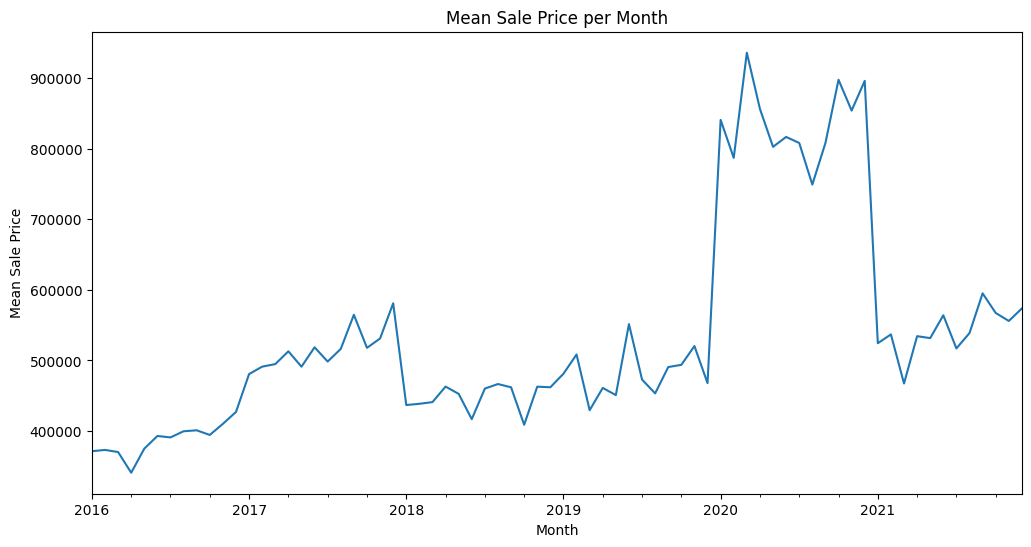

In [34]:
import matplotlib.pyplot as plt
plot_data = filtered_data_
plot_data.set_index('SALE DATE', inplace=True)
monthly_mean_prices = plot_data.resample('M')['SALE PRICE'].mean()

plt.figure(figsize=(12, 6))
monthly_mean_prices.plot()
plt.title('Mean Sale Price per Month')
plt.xlabel('Month')
plt.ylabel('Mean Sale Price')
plt.show()


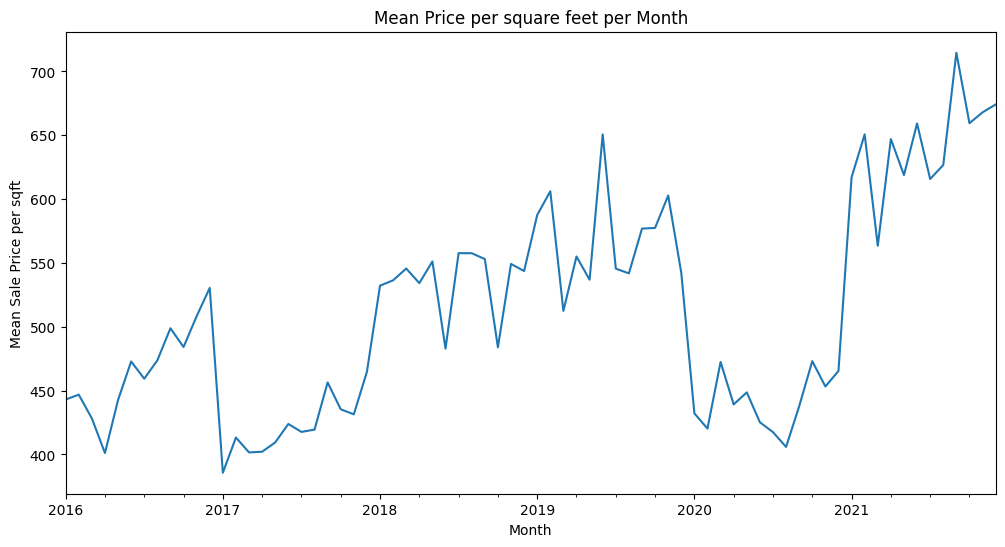

In [35]:

monthly_mean_prices_sqft = filtered_data_.resample('M')['PRICE PER SQFT'].mean()

plt.figure(figsize=(12, 6))
monthly_mean_prices_sqft.plot()
plt.title('Mean Price per square feet per Month')
plt.xlabel('Month')
plt.ylabel('Mean Sale Price per sqft')
plt.show()


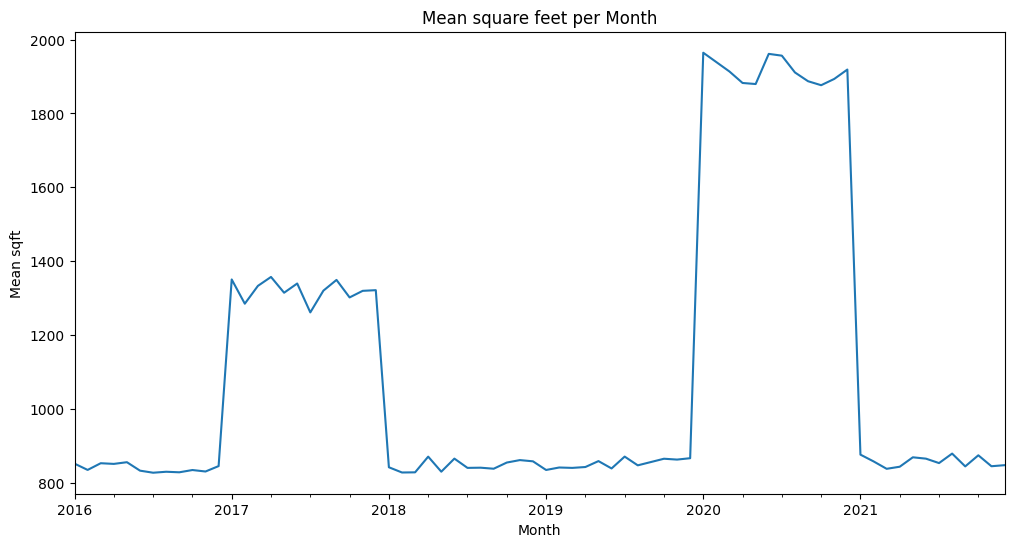

In [36]:
monthly_mean_gsqf = filtered_data_.resample('M')['GROSS SQUARE FEET'].mean()

plt.figure(figsize=(12, 6))
monthly_mean_gsqf.plot()
plt.title('Mean square feet per Month')
plt.xlabel('Month')
plt.ylabel('Mean sqft')
plt.show()

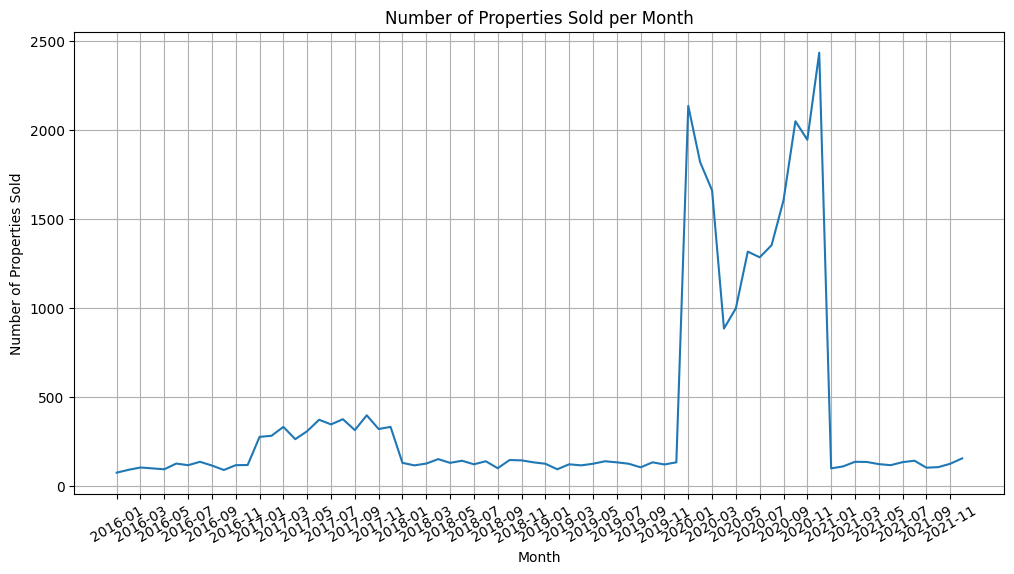

In [37]:
import matplotlib.pyplot as plt

monthly_sales = filtered_data_.resample('M').size().reset_index(name='Number of Sales')

# Rename 'SALE DATE' column to 'Month'
monthly_sales.rename(columns={'SALE DATE': 'Month'}, inplace=True)

# Plot the graph
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Month'].astype(str), monthly_sales['Number of Sales'])

# Adjust xticks
xticks_spacing = 2  # Change this value to control the spacing between ticks
xticks_fontsize = 10  # Change this value to control the font size of ticks
xticks_indices = range(0, len(monthly_sales['Month']), xticks_spacing)
xticks_labels = [monthly_sales['Month'].iloc[i].strftime('%Y-%m') for i in xticks_indices]

plt.xticks(xticks_indices, xticks_labels, rotation=30, fontsize=xticks_fontsize)
plt.xlabel('Month')
plt.ylabel('Number of Properties Sold')
plt.title('Number of Properties Sold per Month')
plt.grid()
plt.show()


In [38]:
filtered_data.head()

,SALE DATE,SALE PRICE,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,Latitude,Longitude,Council District,Census Tract,BUILDING CLASS CATEGORY,PRICE PER SQFT
ZIP CODE,,,,,,,,,,,,,,,,,
10469.0,2019-06-29,1,4751,52,1.0,0.0,1.0,"2,090",948.0,1960.0,1,NaN,NaN,NaN,NaN,01 ONE FAMILY DWELLINGS,0.001055
10469.0,2019-05-13,265000,4751,54,1.0,0.0,1.0,"2,090",948.0,1960.0,1,40.876682,-73.842189,12.0,358.0,01 ONE FAMILY DWELLINGS,279.535865
10469.0,2019-07-25,499000,4751,54,1.0,0.0,1.0,"2,090",948.0,1960.0,1,40.876682,-73.842189,12.0,358.0,01 ONE FAMILY DWELLINGS,526.371308
10469.0,2019-08-27,300000,4751,64,1.0,0.0,1.0,"2,090",948.0,1960.0,1,40.877064,-73.842387,12.0,358.0,01 ONE FAMILY DWELLINGS,316.455696
10469.0,2019-06-13,300000,4881,63,1.0,0.0,1.0,"2,500",686.0,1915.0,1,40.878295,-73.837079,12.0,46202.0,01 ONE FAMILY DWELLINGS,437.317784


In [39]:
Sales_all_drop_null = filtered_data.copy()
Sales_all_drop_null.head()

,SALE DATE,SALE PRICE,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,Latitude,Longitude,Council District,Census Tract,BUILDING CLASS CATEGORY,PRICE PER SQFT
ZIP CODE,,,,,,,,,,,,,,,,,
10469.0,2019-06-29,1,4751,52,1.0,0.0,1.0,"2,090",948.0,1960.0,1,NaN,NaN,NaN,NaN,01 ONE FAMILY DWELLINGS,0.001055
10469.0,2019-05-13,265000,4751,54,1.0,0.0,1.0,"2,090",948.0,1960.0,1,40.876682,-73.842189,12.0,358.0,01 ONE FAMILY DWELLINGS,279.535865
10469.0,2019-07-25,499000,4751,54,1.0,0.0,1.0,"2,090",948.0,1960.0,1,40.876682,-73.842189,12.0,358.0,01 ONE FAMILY DWELLINGS,526.371308
10469.0,2019-08-27,300000,4751,64,1.0,0.0,1.0,"2,090",948.0,1960.0,1,40.877064,-73.842387,12.0,358.0,01 ONE FAMILY DWELLINGS,316.455696
10469.0,2019-06-13,300000,4881,63,1.0,0.0,1.0,"2,500",686.0,1915.0,1,40.878295,-73.837079,12.0,46202.0,01 ONE FAMILY DWELLINGS,437.317784


In [40]:
# Sales_all_drop_null['SALE DATE'] = pd.to_datetime(Sales_all_drop_null.index)
# Sales_all_drop_null.reset_index(drop=True)
 
#Sales_all_drop_null['SALE DATE'] = pd.to_datetime(Sales_all_drop_null['SALE DATE'])
Sales_all_drop_null_featurs = Sales_all_drop_null[['SALE DATE', 'SALE PRICE', 'BLOCK', 'LOT', 'RESIDENTIAL UNITS',
       'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET',
       'GROSS SQUARE FEET', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE','Council District',
       'Census Tract','PRICE PER SQFT']].copy()
Sales_all_drop_null_featurs.sort_values(by='SALE DATE', inplace=True)
Sales_all_drop_null_featurs.head()


,SALE DATE,SALE PRICE,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,Council District,Census Tract,PRICE PER SQFT
ZIP CODE,,,,,,,,,,,,,,
11360.0,2016-01-04,785000,5994,73,1.0,0.0,1.0,"4,100",948.0,1950.0,1,19.0,1093.0,828.059072
10301.0,2016-01-04,270000,55,43,1.0,0.0,1.0,"3,894",804.0,1950.0,1,49.0,81.0,335.820896
10305.0,2016-01-04,355000,3353,8,1.0,0.0,1.0,"1,200",960.0,1989.0,1,50.0,70.0,369.791667
10302.0,2016-01-05,255000,1008,67,3.0,0.0,3.0,"8,875",900.0,1940.0,1,49.0,207.0,283.333333
10314.0,2016-01-05,475000,1982,47,1.0,0.0,1.0,"2,700",936.0,1960.0,1,50.0,27302.0,507.478632


In [41]:
Sales_all_drop_null_featurs = Sales_all_drop_null[['SALE DATE', 'SALE PRICE', 'BLOCK', 'LOT', 'RESIDENTIAL UNITS',
       'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET',
       'GROSS SQUARE FEET', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE','Council District',
       'Census Tract','PRICE PER SQFT']].copy()
Sales_all_drop_null_featurs = Sales_all_drop_null_featurs.sort_index()


In [42]:

Sales_all_drop_null_featurs.head()

,SALE DATE,SALE PRICE,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,Council District,Census Tract,PRICE PER SQFT
ZIP CODE,,,,,,,,,,,,,,
10003.0,2020-10-30,15850000,567,16,1.0,0.0,1.0,2307,5178.0,1900.0,1,2.0,59.0,3061.027424
10003.0,2020-10-01,9350000,924,12,1.0,0.0,1.0,1840,4500.0,1901.0,1,2.0,48.0,2077.777778
10003.0,2020-11-25,28000000,568,10,1.0,0.0,1.0,1976,6202.0,1900.0,1,2.0,61.0,4514.672686
10003.0,2020-10-29,9000000,874,50,1.0,0.0,1.0,2162,7589.0,1910.0,1,2.0,50.0,1185.927000
10003.0,2020-05-28,8405000,450,10,3.0,0.0,3.0,2013,6875.0,1901.0,1,2.0,38.0,1222.545455


In [43]:
group_by_day = Sales_all_drop_null_featurs.groupby('SALE DATE').mean()
group_by_day

/var/folders/_7/b07lfzkx0psbnj2y78f99fxw0000gn/T/ipykernel_21150/1139835144.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_by_day = Sales_all_drop_null_featurs.groupby('SALE DATE').mean()


,SALE PRICE,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,Council District,Census Tract,PRICE PER SQFT
SALE DATE,,,,,,,,,,,,
2016-01-04,470000.000000,3134.000000,41.333333,1.000000,0.0,1.000000,904.000000,1963.000000,1.0,39.333333,414.666667,511.223878
2016-01-05,365000.000000,1495.000000,57.000000,2.000000,0.0,2.000000,918.000000,1950.000000,1.0,49.500000,13754.500000,395.405983
2016-01-06,352125.000000,5951.000000,204.000000,1.000000,0.0,1.000000,790.250000,1923.000000,1.0,30.000000,3068.250000,446.316341
2016-01-07,677800.000000,2925.800000,26.800000,1.000000,0.0,1.000000,883.200000,1935.000000,1.0,40.800000,4029.800000,790.063605
2016-01-08,465259.333333,11973.000000,495.666667,1.333333,0.0,1.333333,916.000000,1928.333333,1.0,35.666667,36095.666667,536.839997
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,468768.500000,6509.000000,85.500000,1.000000,0.0,1.000000,864.166667,1943.000000,1.0,38.333333,354.666667,521.263895
2021-12-27,723333.333333,5407.000000,69.666667,1.000000,0.0,1.000000,952.333333,1931.666667,1.0,29.000000,52554.000000,758.412685
2021-12-28,473251.333333,4886.166667,45.833333,1.000000,0.0,1.000000,857.166667,1947.333333,1.0,30.500000,353.333333,554.041297


In [44]:
df = pd.DataFrame({'PRICE PER SQFT': group_by_day.iloc[:, 0]})
df['date'] = df.index
df = df.reset_index(drop=True)
df.head()

,PRICE PER SQFT,date
0,470000.000000,2016-01-04
1,365000.000000,2016-01-05
2,352125.000000,2016-01-06
3,677800.000000,2016-01-07
4,465259.333333,2016-01-08


Text(0, 0.5, 'SALE PRICE')

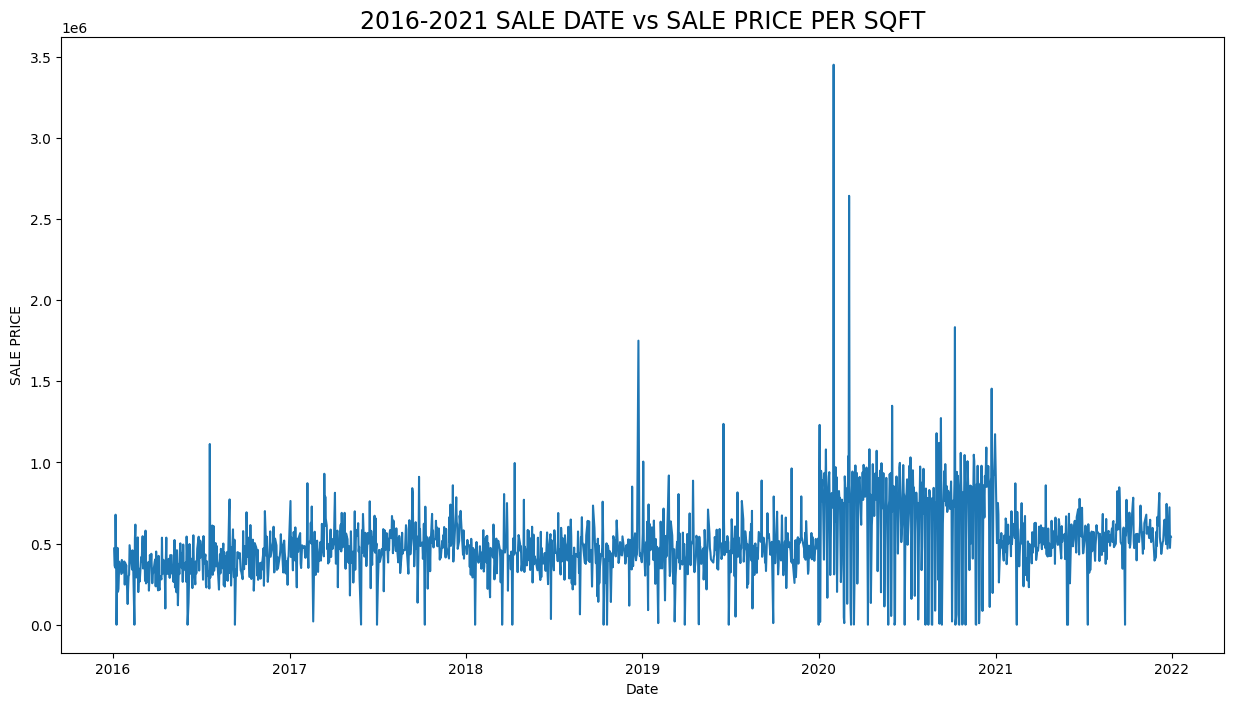

In [45]:
plt.figure(figsize = (15,8))
df['date'] = pd.to_datetime(df['date'])
plt.plot(df['date'],df['PRICE PER SQFT']);
plt.title('2016-2021 SALE DATE vs SALE PRICE PER SQFT', fontsize=17)
plt.xlabel('Date')
plt.ylabel('SALE PRICE')

### use linear regression to explore the trends over 3 years, and report is there a significant trend in the BART data.

 using the index to represent the day count from the first day.

In [46]:
lm = sm.OLS(df['PRICE PER SQFT'], sm.add_constant(df.index)).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         PRICE PER SQFT   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     186.5
Date:                Fri, 28 Apr 2023   Prob (F-statistic):           2.77e-40
Time:                        18:46:04   Log-Likelihood:                -22506.
No. Observations:                1640   AIC:                         4.502e+04
Df Residuals:                    1638   BIC:                         4.503e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.846e+05   1.09e+04     35.300      0.0

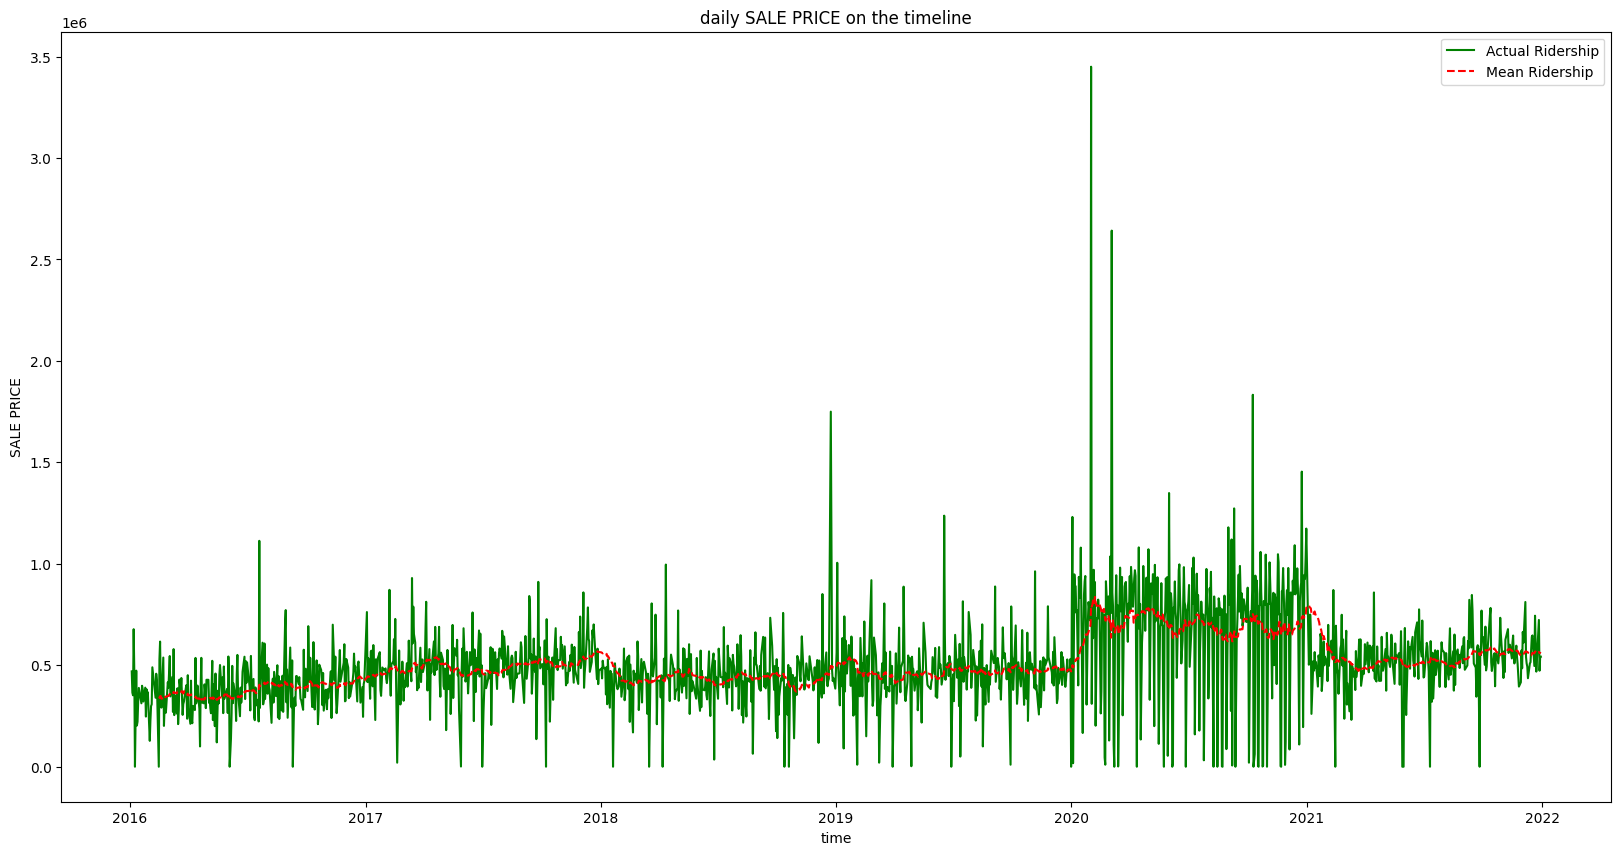

In [47]:
# plot the daily taxi ridership on the timeline
# the '--' line is 30-day moving average

xTime = df['date']
ySALE_PRICE = df['PRICE PER SQFT']

plt.figure(figsize = (20,10))
plt.title('daily SALE PRICE on the timeline')
plt.xlabel('time')
plt.ylabel('SALE PRICE')
FHV_ata_line = plt.plot(xTime,ySALE_PRICE, label = 'Actual Ridership', color = 'green')
FHV_mean_line = plt.plot(xTime,ySALE_PRICE.rolling(window = 30).mean(), label='Mean Ridership ', linestyle='--',color='red')
plt.legend()

plt.legend()
plt.show()

Text(0, 0.5, 'Average SALE PRICE')

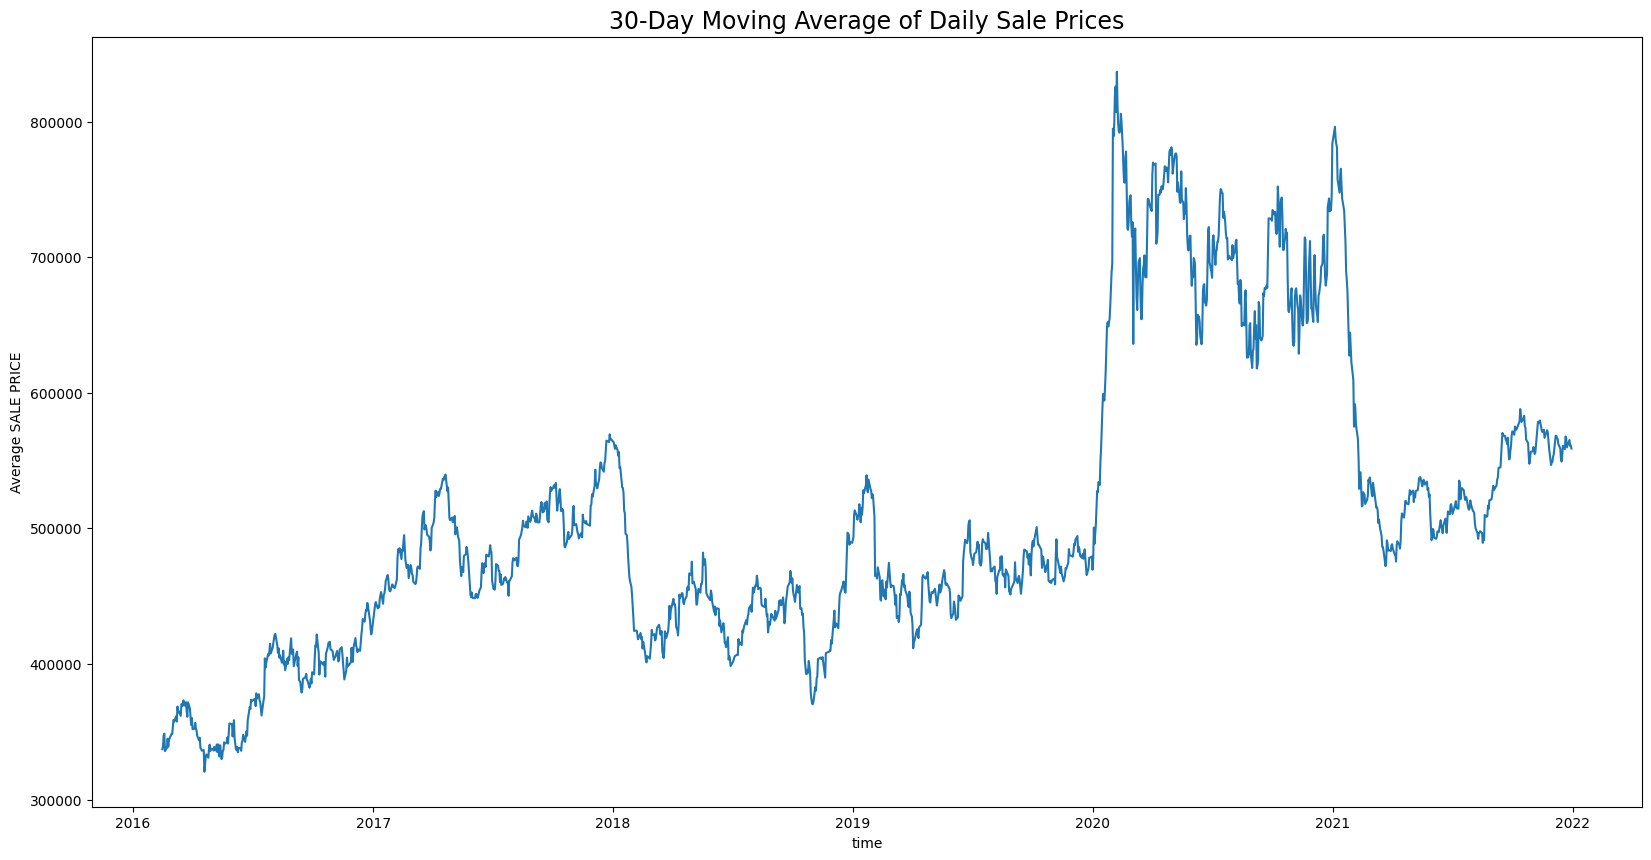

In [48]:
#smoothen the time-series 
#one year moving average (avg values over the last year preceding the oversation)
#plt.figure(figsize = (10,5))
matplotlib.rcParams['figure.figsize'] = [20, 10]
plt.plot(xTime,df['PRICE PER SQFT'].rolling(window = 30).mean());
plt.title('30-Day Moving Average of Daily Sale Prices', fontsize=17)
plt.xlabel('time')
plt.ylabel('Average SALE PRICE')

Text(0, 0.5, 'Average SALE PRICE')

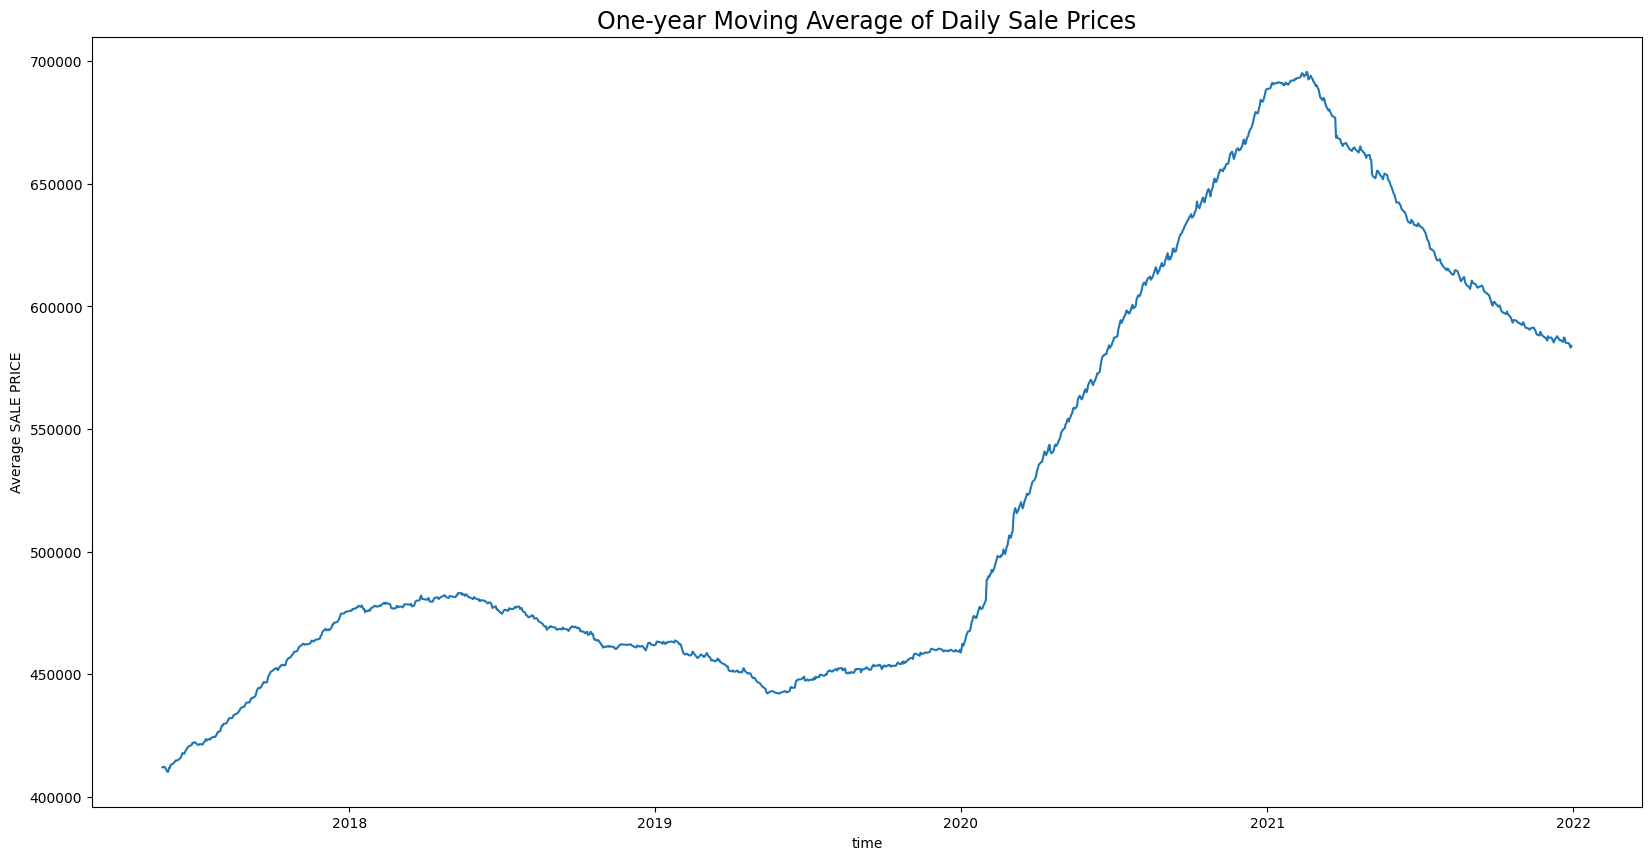

In [49]:
#smoothen the time-series 
#one year moving average (avg values over the last year preceding the oversation)
#plt.figure(figsize = (10,5))
matplotlib.rcParams['figure.figsize'] = [20, 10]
plt.plot(xTime,df['PRICE PER SQFT'].rolling(window = 365).mean());
plt.title('One-year Moving Average of Daily Sale Prices', fontsize=17)
plt.xlabel('time')
plt.ylabel('Average SALE PRICE')

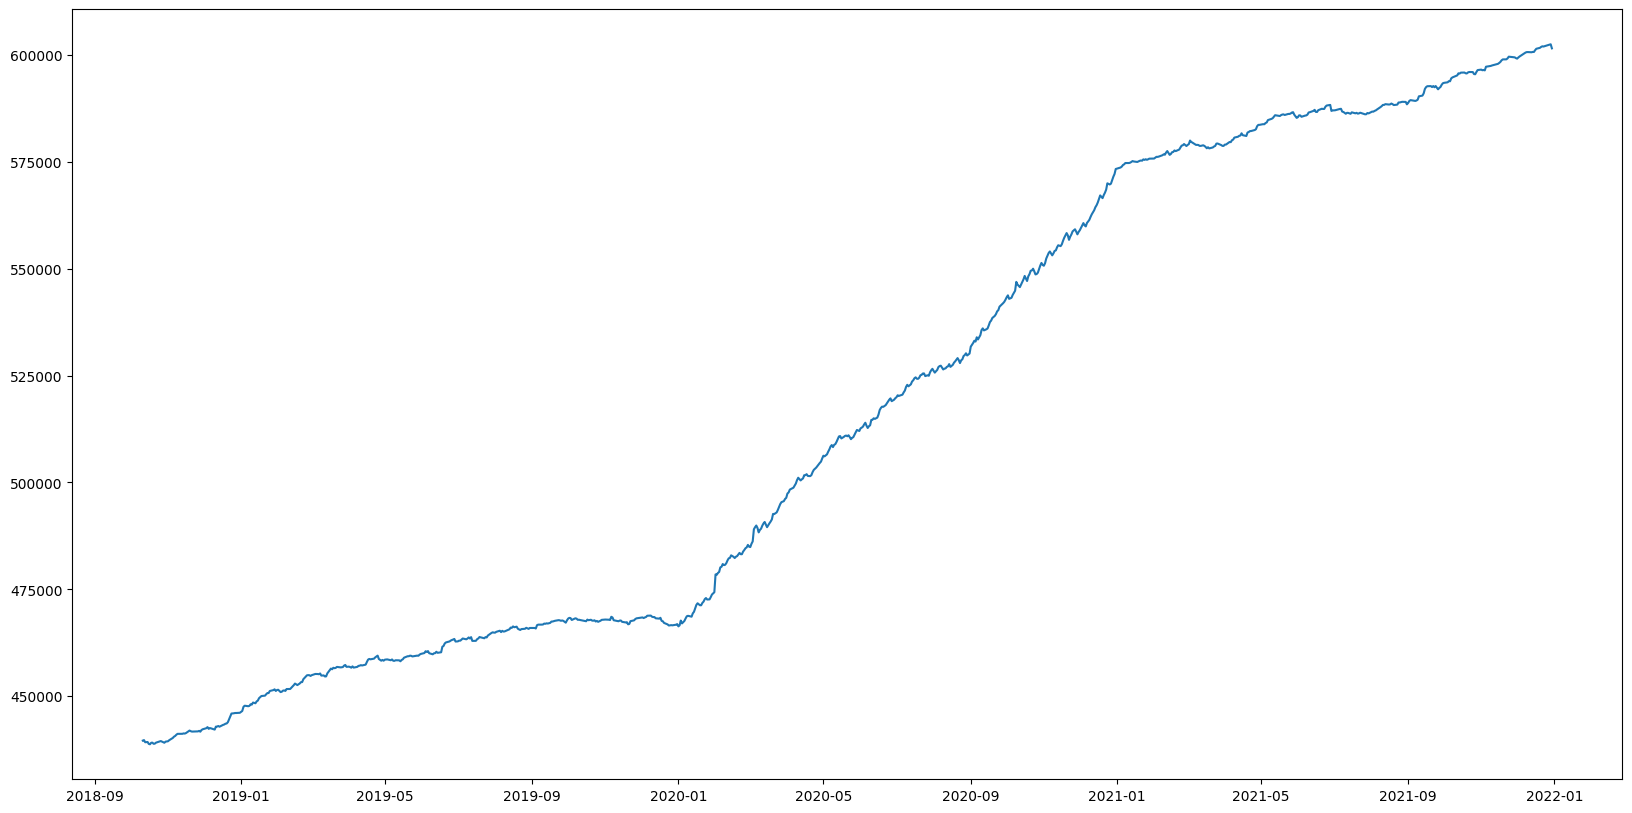

In [50]:
#smoothen the time-series 
#one year moving average (avg values over the last year preceding the oversation)
#plt.figure(figsize = (10,5))
matplotlib.rcParams['figure.figsize'] = [20, 10]
plt.plot(xTime,df['PRICE PER SQFT'].rolling(window = 365*2).mean());

Text(0, 0.5, 'Average SALE PRICE')

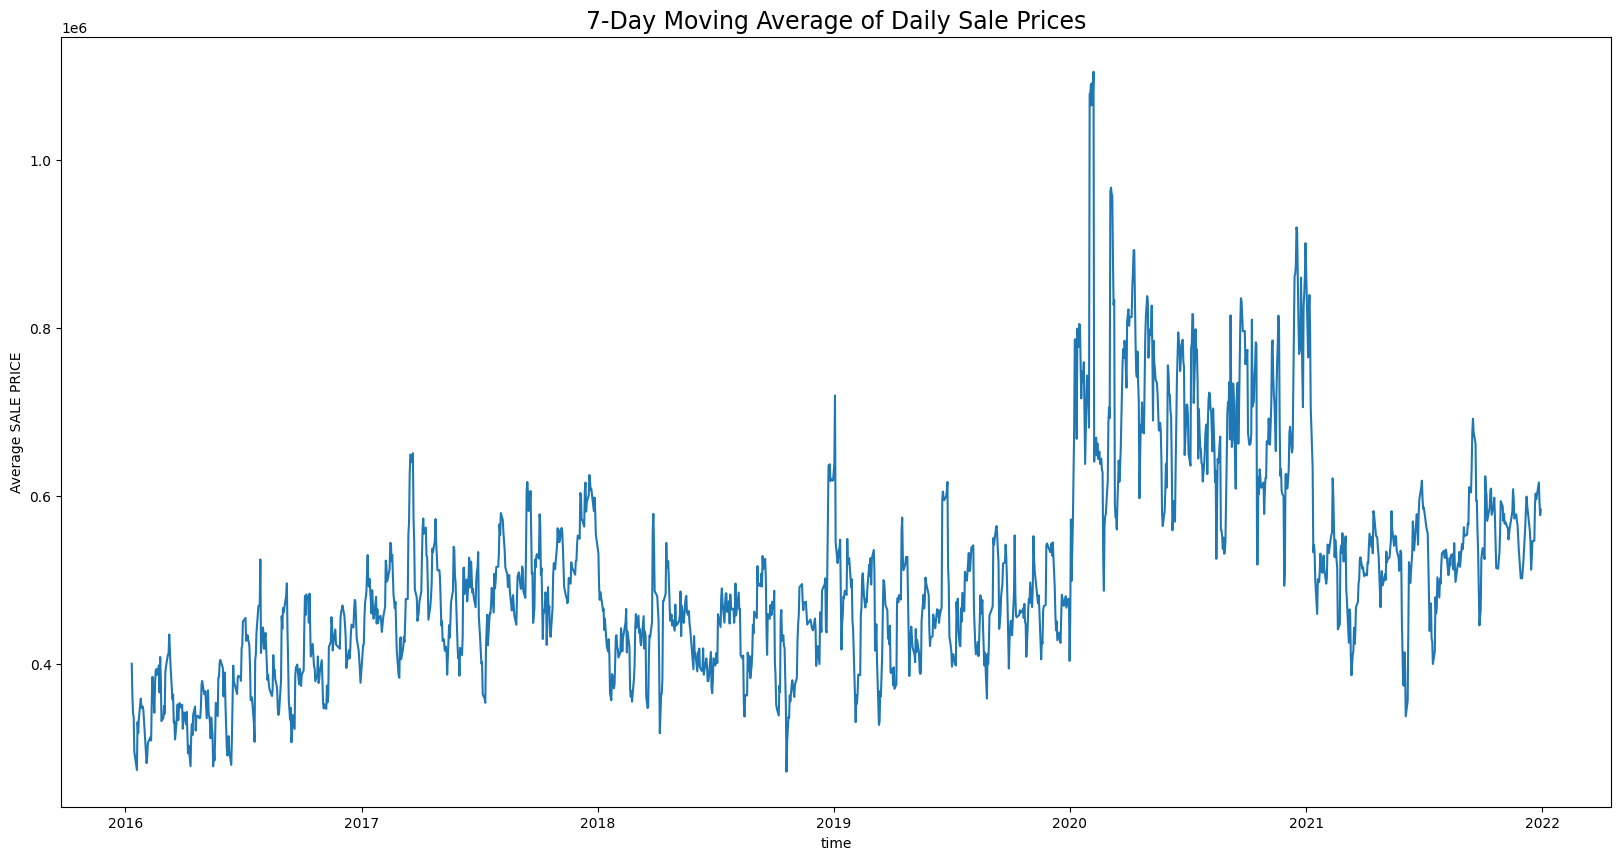

In [51]:
#smoothen the time-series 
#one year moving average (avg values over the last year preceding the oversation)
#plt.figure(figsize = (10,5))
matplotlib.rcParams['figure.figsize'] = [20, 10]
plt.plot(xTime,df['PRICE PER SQFT'].rolling(window = 7).mean());
plt.title('7-Day Moving Average of Daily Sale Prices', fontsize=17)
plt.xlabel('time')
plt.ylabel('Average SALE PRICE')

### Find a proper period using scipy.signal.periodogram and autocorrelation


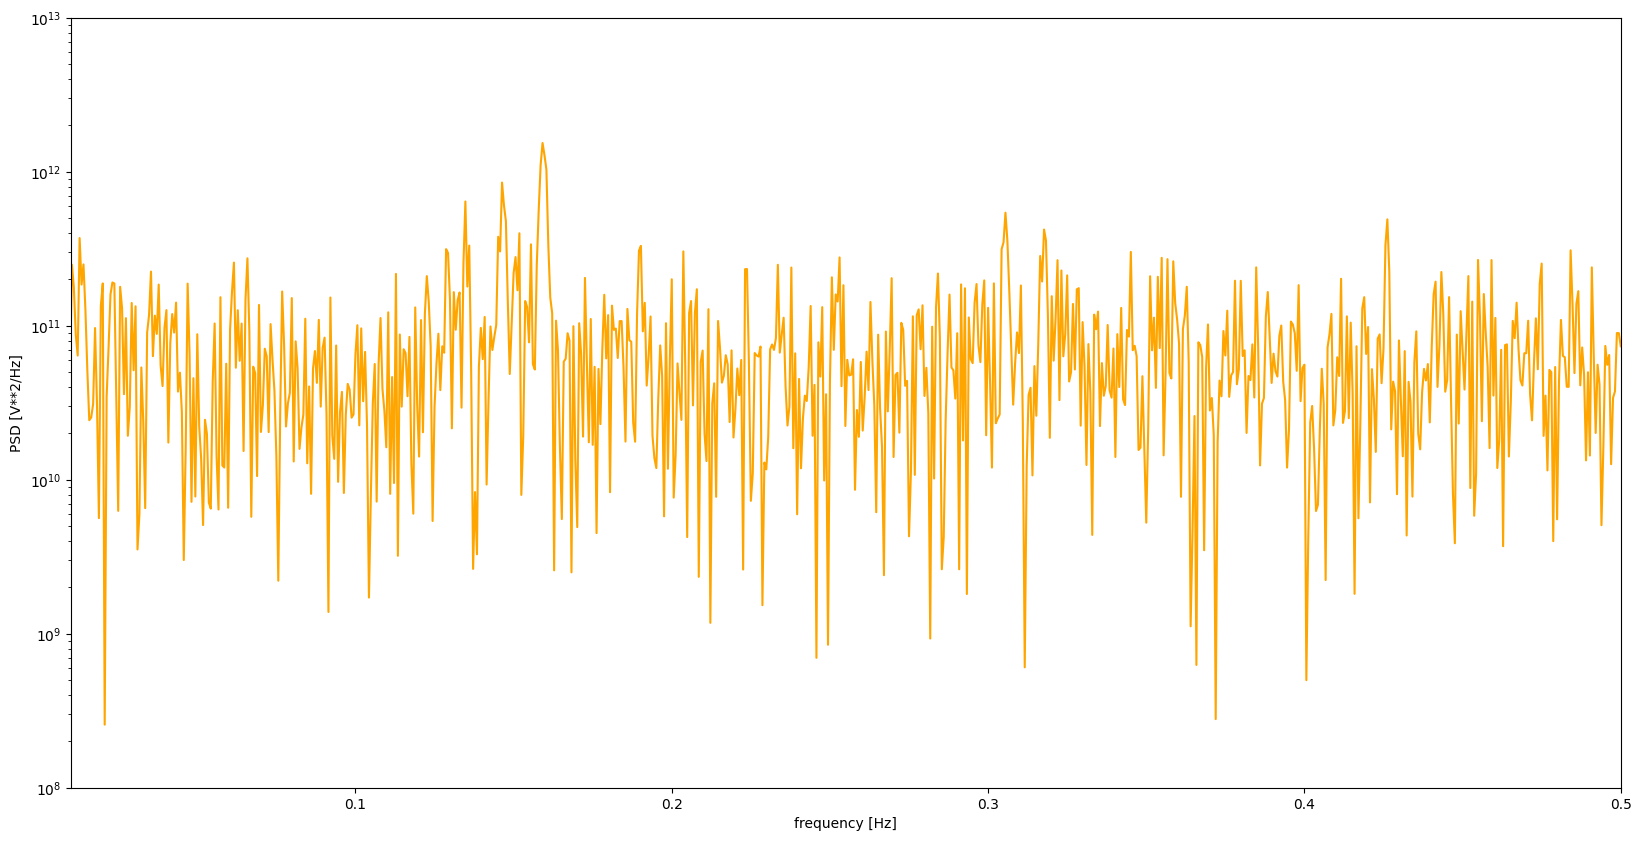

Strongest period in the daily SALE PRICE data = 6.283524904214559


In [52]:
#find possible periods if we're not sure which one to take

#plt.figure(figsize = (10,5))
f, PSD = scipy.signal.periodogram(df['PRICE PER SQFT'])
plt.semilogy(f, PSD, 'orange')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.xlim(0.01,0.5) #period from 2 to len(PSD) days
plt.ylim(1e8,1e13)
#plt.rcParams['figure.figsize'] = (20, 10)
plt.show()
PSD = PSD[f>0.01]; f = f[f>0.01]

print('Strongest period in the daily SALE PRICE data = {}'.format(1/f[np.argmax(PSD)]))

(-1.0, 1.2)

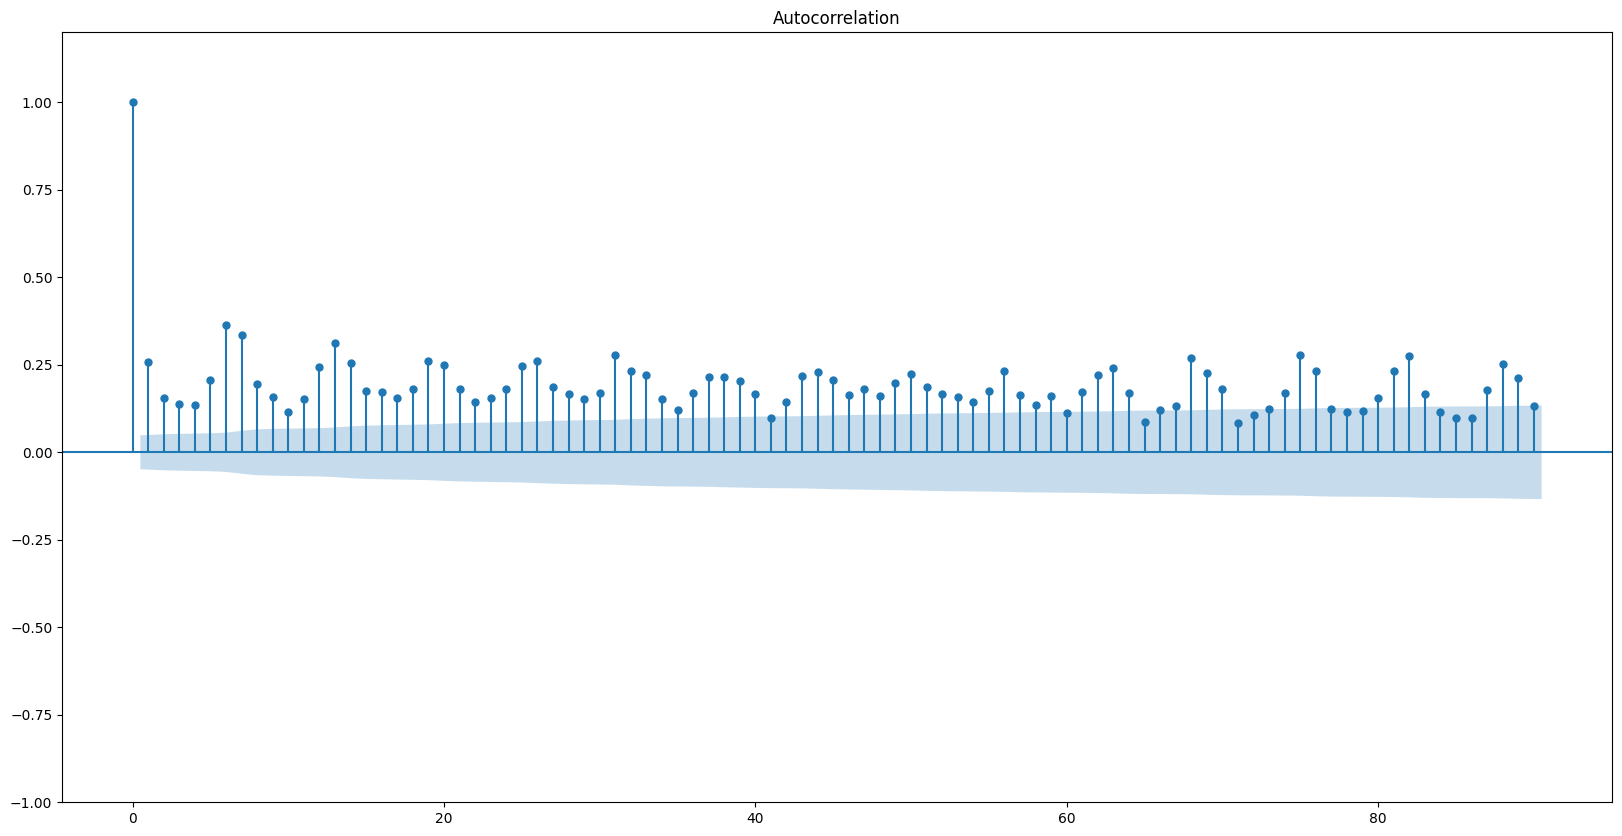

In [53]:
plot_acf(df['PRICE PER SQFT'], lags = 90); #plot autocorrelations for lags up to 3 months #we see spikes around 7 (1 week), 14 (2 weeks) etc highlighting a weekly period
plt.ylim(-1,1.2)

### Construct a linear regression for trend + seasonality (using a weekly time period with 7 dummy variables for each day of the week) to predict passenger numbers. Train from 2016 to 2020 and test in 2021. Visualize coefficients for each day of the week and analyze their significance

In [54]:
df['DOW'] = pd.to_datetime(df.date).dt.dayofweek #monday = 0, sunday = 6
df.head()

,PRICE PER SQFT,date,DOW
0,470000.000000,2016-01-04,0
1,365000.000000,2016-01-05,1
2,352125.000000,2016-01-06,2
3,677800.000000,2016-01-07,3
4,465259.333333,2016-01-08,4


In [55]:
df[(df['date'] >= '2016-01-01') & (df['date'] <= '2020-12-31')].shape

(1380, 3)

In [56]:
# train the model over the first 1714 days (5 years: 2016,2017,2018,2019,2020)
X = pd.concat([pd.DataFrame(range(df.shape[0]),columns=['day']),pd.get_dummies(df['DOW'],drop_first=False)],axis=1)

In [57]:
#X = sm.add_constant(X) #we do not need an intercept as we have an individual constant for each day of the week (drop_first = False)
#alternatively we can add a constant but then exclude a dummy for Monday using drop_first = True - will do so below
lmPrice=sm.OLS(df['PRICE PER SQFT'][:1714],X[:1714]).fit()
print (lmPrice.summary())

                            OLS Regression Results                            
Dep. Variable:         PRICE PER SQFT   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     76.56
Date:                Fri, 28 Apr 2023   Prob (F-statistic):           4.14e-96
Time:                        18:46:05   Log-Likelihood:                -22361.
No. Observations:                1640   AIC:                         4.474e+04
Df Residuals:                    1632   BIC:                         4.478e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
day          176.4856     10.623     16.613      0.0

In [58]:
lmPrice.params

day       176.485618
0      381597.071817
1      401823.964838
2      400568.685898
3      395436.394387
4      389854.183578
5       29937.552604
6       93428.814448
dtype: float64

<BarContainer object of 7 artists>

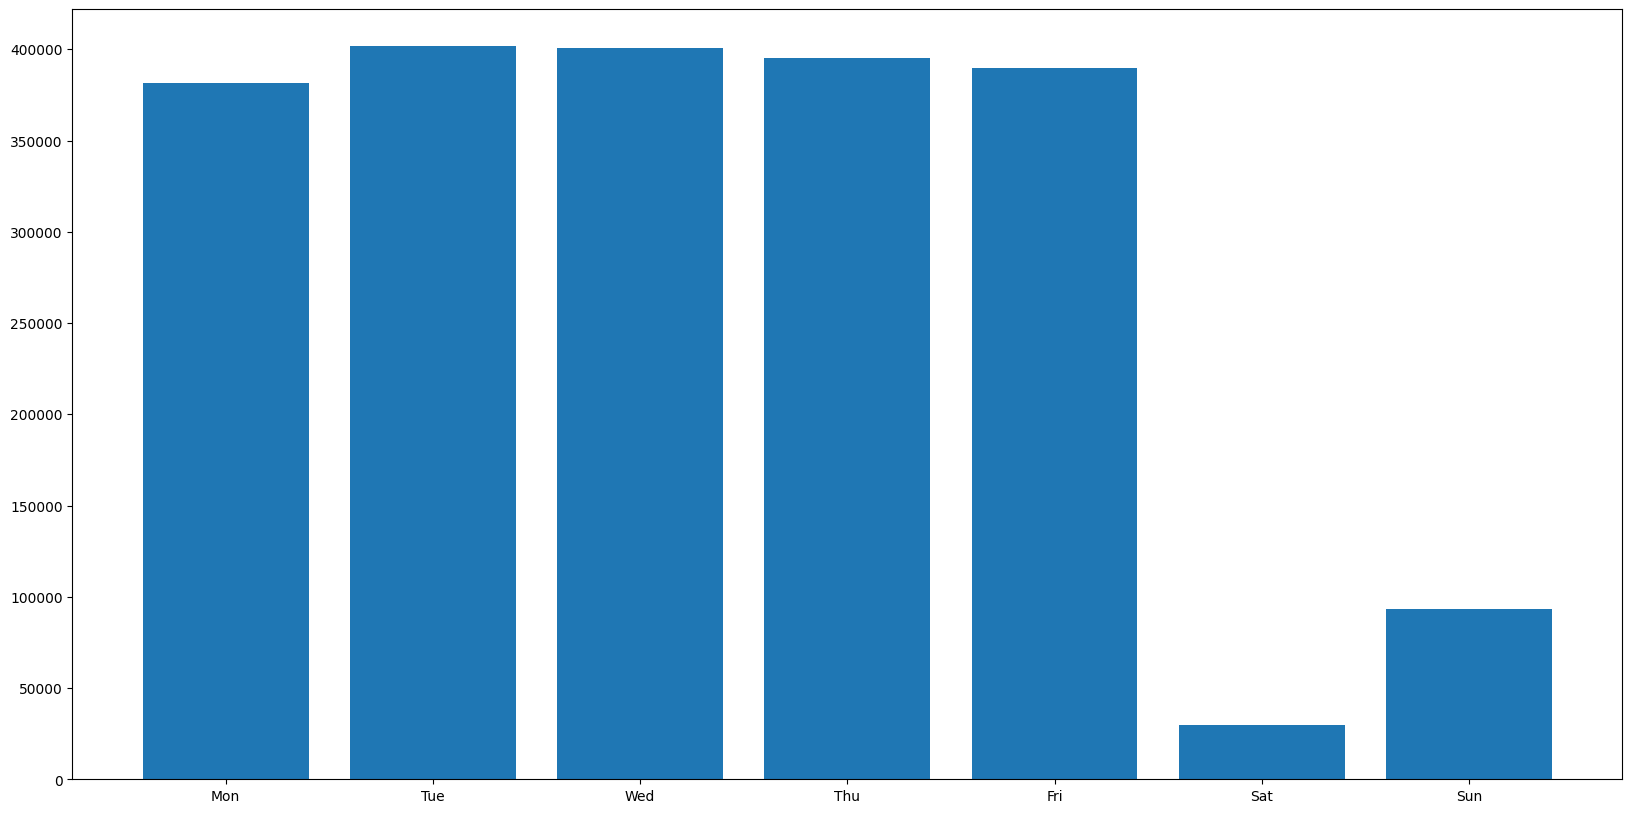

In [59]:
# visualize the effect of each day of week on sale price 
plt.bar(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], 
        lmPrice.params[1:].tolist())

In [60]:
# train the model over the first 1714 days (5 years: 2016,2017,2018,2019,2020)
X2 = pd.concat([pd.DataFrame(range(df.shape[0]),columns=['day']),pd.get_dummies(df['DOW'],drop_first=True)],axis=1)
X2 = sm.add_constant(X2) #use intercept instead of an exluded dummy for Monday; other dummies will be relative
lmPrice2=sm.OLS(df['PRICE PER SQFT'][:1714],X2[:1714]).fit()
print (lmPrice2.summary())

                            OLS Regression Results                            
Dep. Variable:         PRICE PER SQFT   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     76.56
Date:                Fri, 28 Apr 2023   Prob (F-statistic):           4.14e-96
Time:                        18:46:06   Log-Likelihood:                -22361.
No. Observations:                1640   AIC:                         4.474e+04
Df Residuals:                    1632   BIC:                         4.478e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.816e+05   1.47e+04     25.970      0.0

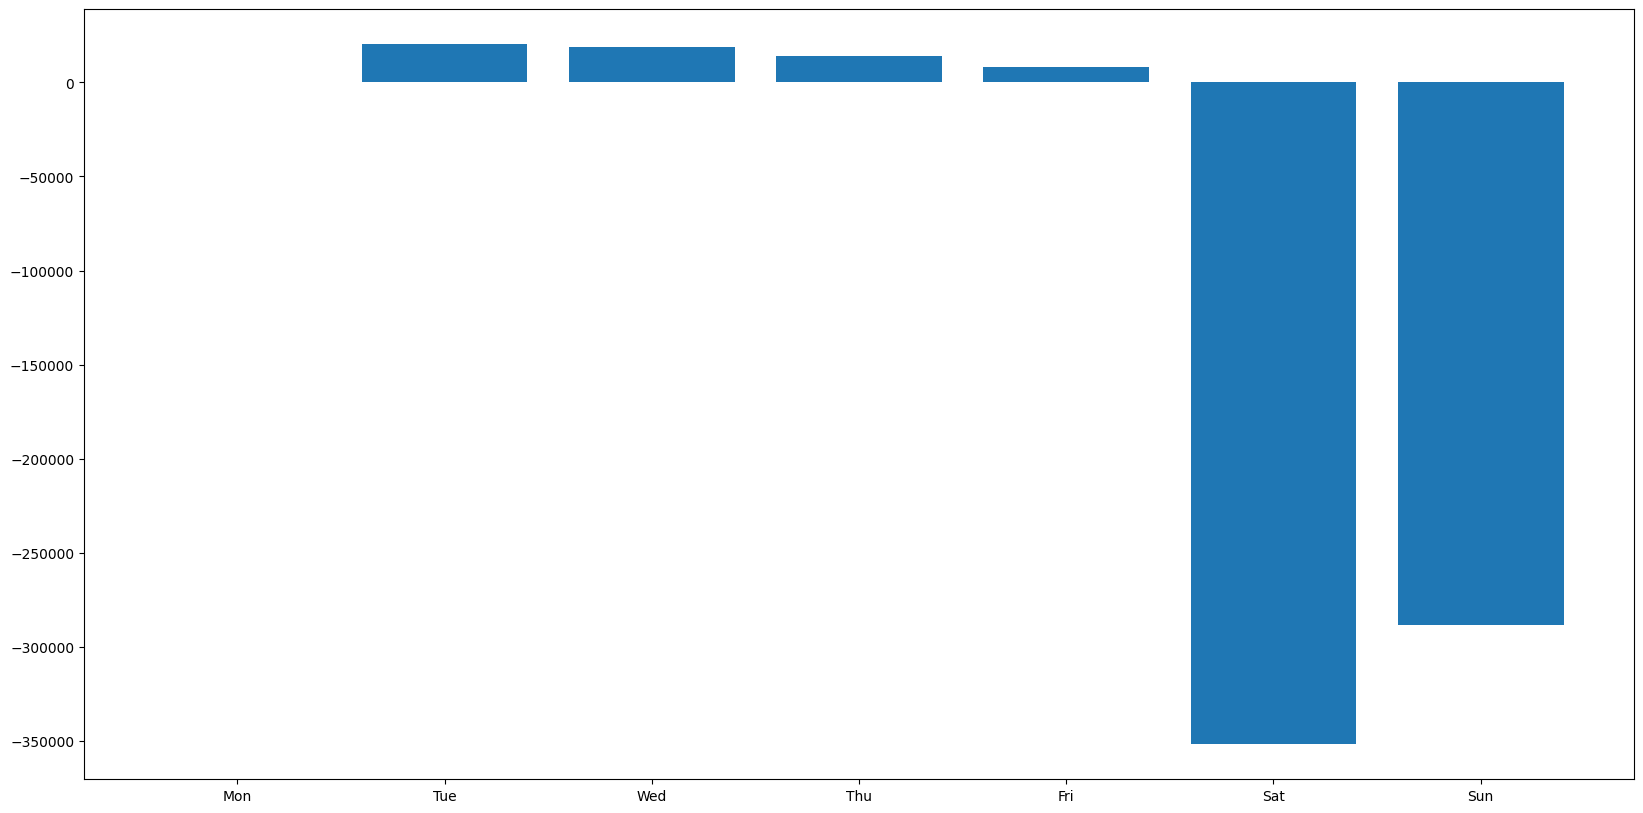

In [61]:
# visualize the effect of each day of week on sale price; relatively Monday
plt.bar(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], 
        [0] + lmPrice2.params[2:].tolist())
#plt.ylim([-1000,5000]);
plt.show()

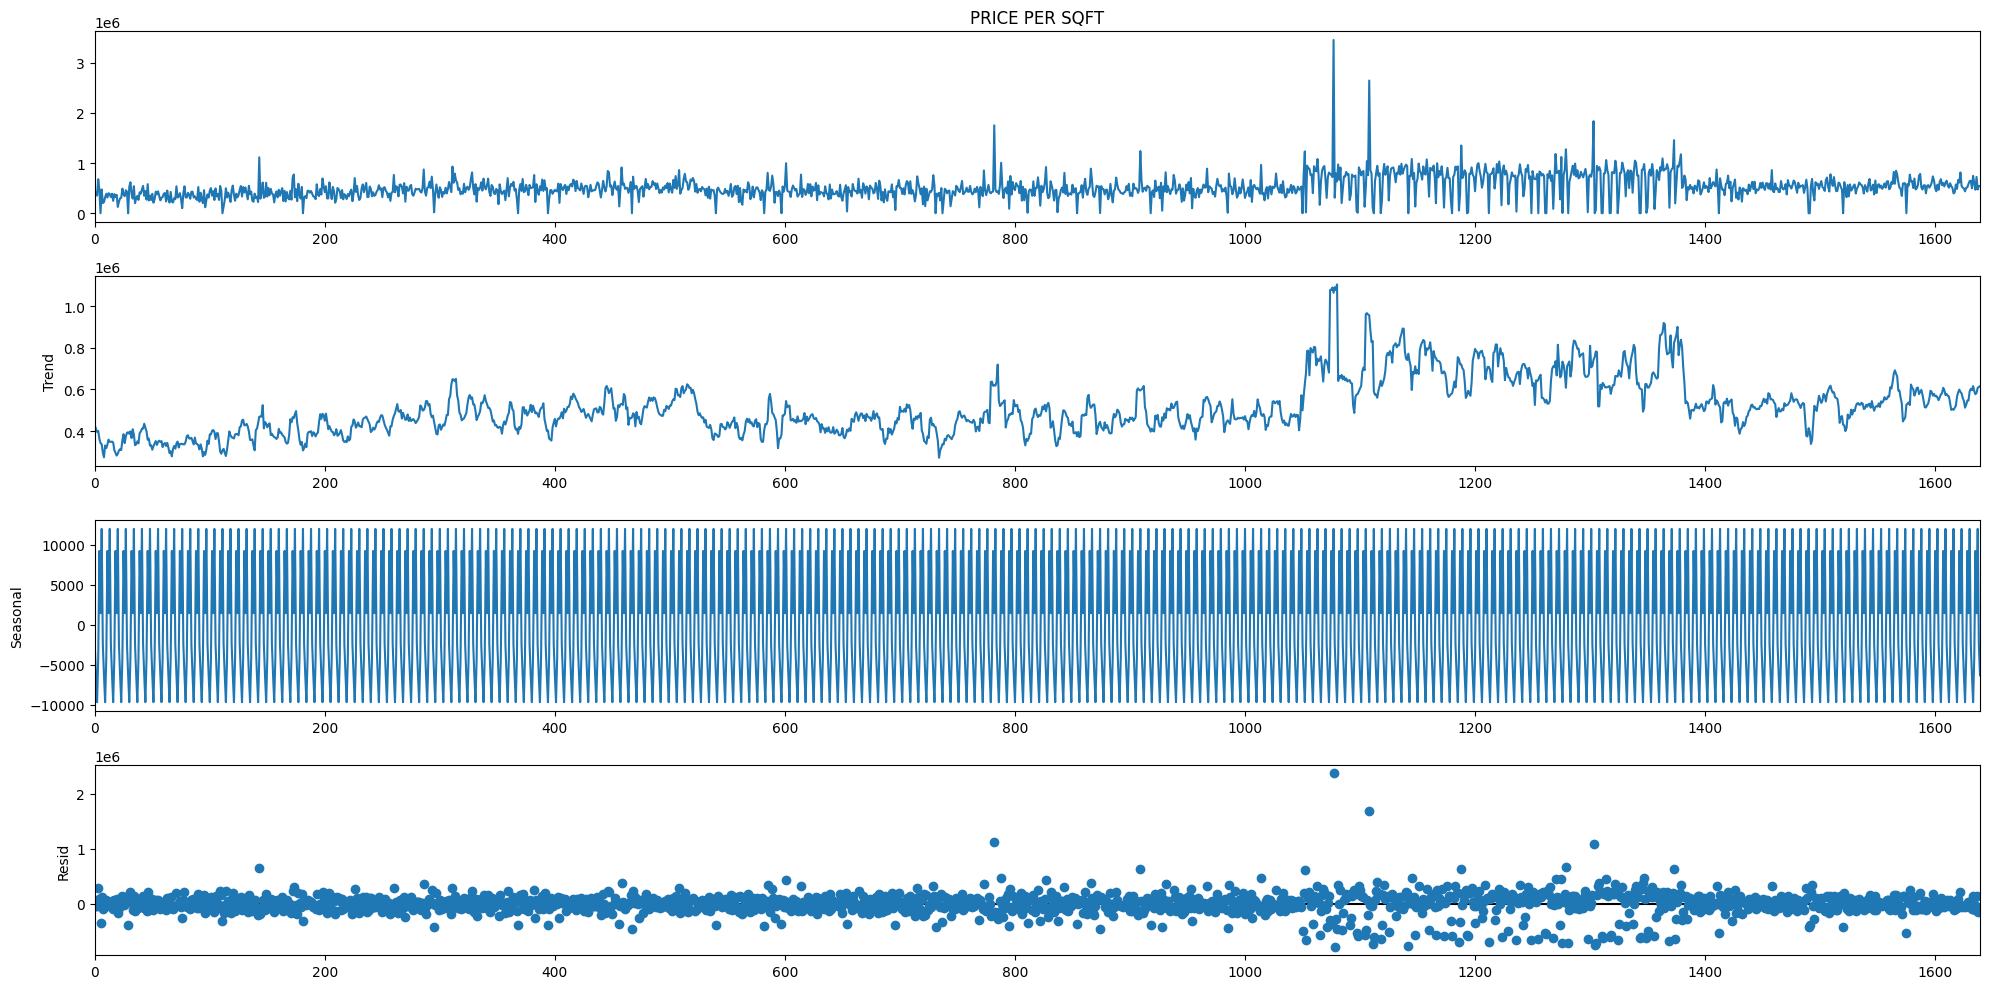

In [62]:
dailyData = df.iloc[:1714]
dailyDecomp = seasonal_decompose(dailyData['PRICE PER SQFT'], model='additive', period = 7, extrapolate_trend='freq')
fig = dailyDecomp.plot()

### Use the adfuller tool to determine if the time series is stationary or not, $\alpha=0.05$. If not, find a proper order of differencing (d) in the ARIMA model to reach the stationarity, and report adfuller test results after differencing.

In [63]:
df

,PRICE PER SQFT,date,DOW
0,470000.000000,2016-01-04,0
1,365000.000000,2016-01-05,1
2,352125.000000,2016-01-06,2
3,677800.000000,2016-01-07,3
4,465259.333333,2016-01-08,4
...,...,...,...
1635,468768.500000,2021-12-23,3
1636,723333.333333,2021-12-27,0
1637,473251.333333,2021-12-28,1
1638,541267.777778,2021-12-29,2


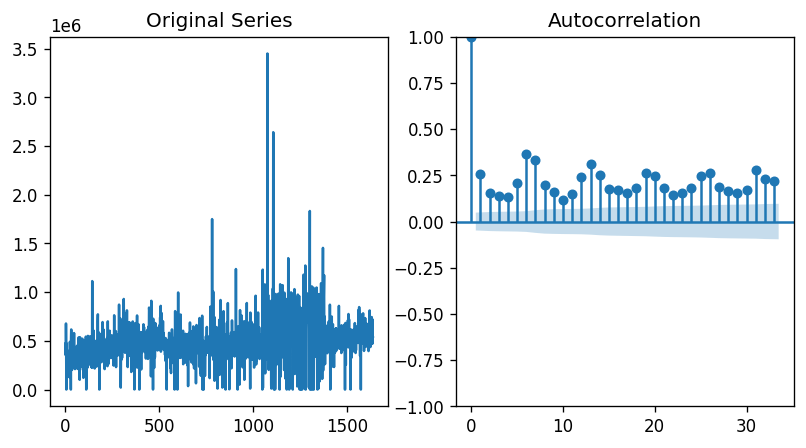

ADF Statistic: -3.017857
p-value: 0.033260
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [64]:
plt.rcParams.update({'figure.figsize':(15,10), 'figure.dpi':120})
fig, axes = plt.subplots(1, 2,figsize=(8,4))
axes[0].plot(df['PRICE PER SQFT'])
axes[0].set_title('Original Series')
plot_acf(df['PRICE PER SQFT'], ax=axes[1])
plt.show()

series=df['PRICE PER SQFT']
result = adfuller(series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

### Analyze the PACF and ACF plots to determine appropriate number of AR, MA terms¶

find the AR term (q)

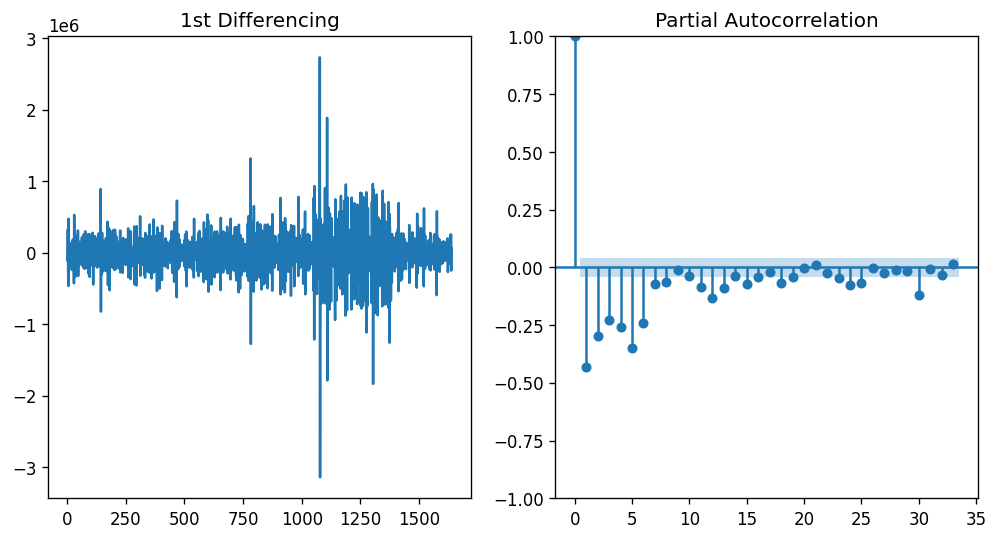

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].plot(df['PRICE PER SQFT'].diff())
axes[0].set_title('1st Differencing')
# axes[1].set_ylim(0,1)
plot_pacf(df['PRICE PER SQFT'].diff().dropna(), ax=axes[1], alpha=0.1, method='ywm') # use 'ywm' method to compute PACF

plt.show()


find the MA term (p)

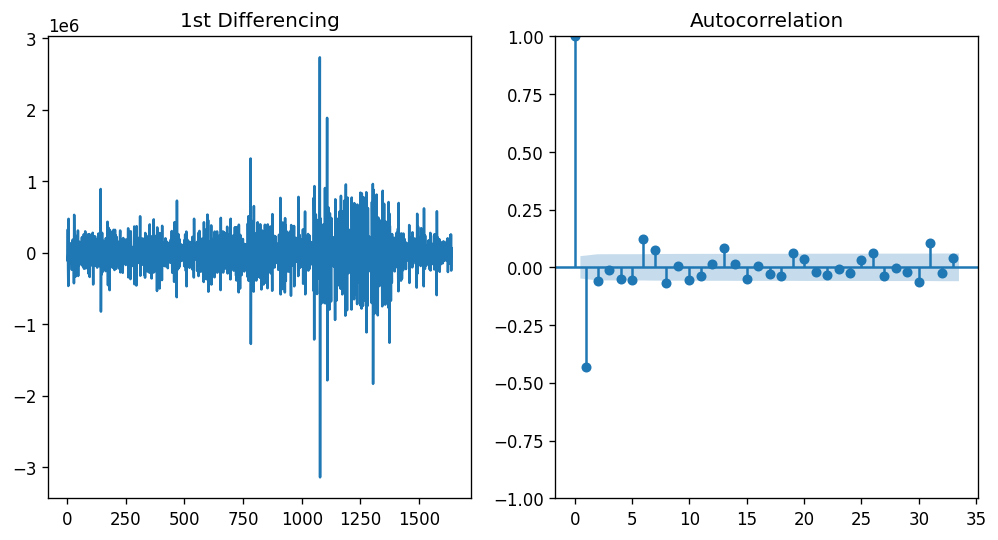

In [66]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].plot(df['PRICE PER SQFT'].diff()); axes[0].set_title('1st Differencing')
plot_acf(df['PRICE PER SQFT'].diff().dropna(), ax=axes[1])

plt.show()

### Train a model on the first 1800 datapoints using an ARIMA(1,1,1) then predict on the last that 1800-datapoint training set as well as the last 7 data points. Report and comment on residual diagnostics for both train and test periods, including MAE, RSME, PACF, ACF, a normality test, and a formal autocorrelation test (e.g., Ljung–Box test).

In [67]:
len(df)

1640

/Users/tianhao/miniconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:         PRICE PER SQFT   No. Observations:                 1275
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -17396.571
Date:                Fri, 28 Apr 2023   AIC                          34803.142
Time:                        18:46:07   BIC                          34828.891
Sample:                             0   HQIC                         34812.813
                               - 1275                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7669      2.000     -0.383      0.701      -4.686       3.153
ar.L2          0.0215      0.081      0.266      0.790      -0.137       0.180
ma.L1         -0.1676      2.000     -0.084      0.9

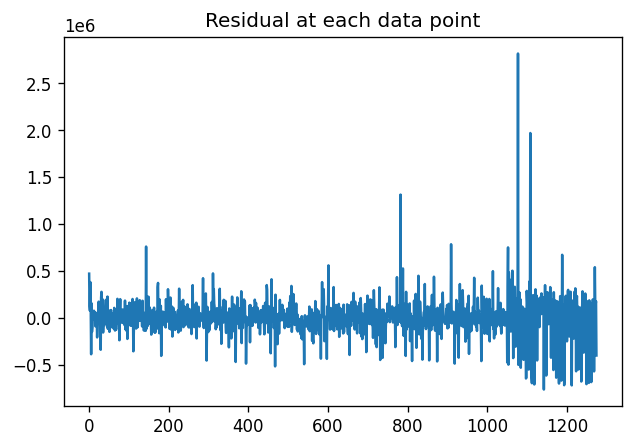

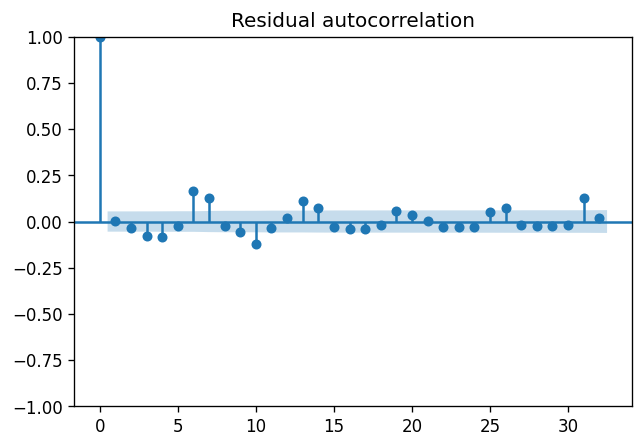

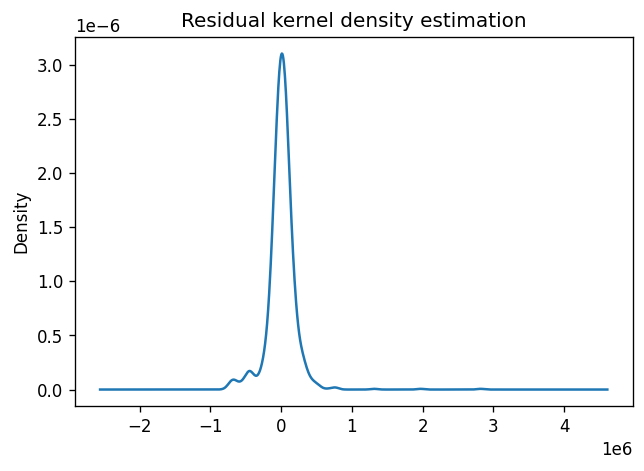

                  0
count  1.275000e+03
mean   7.677379e+03
std    2.062505e+05
min   -7.662336e+05
25%   -6.709671e+04
50%    1.281187e+04
75%    9.217235e+04
max    2.818632e+06
p value is  9.365491909825906e-187
null hypothesis: residuals come from a normal distribution
The null hypothesis can be rejected
Ljung–Box:
       lb_stat     lb_pvalue
1     0.000205  9.885877e-01
2     1.468873  4.797757e-01
3     9.705822  2.123962e-02
4    19.004310  7.844133e-04
5    19.717223  1.411975e-03
6    54.508513  5.825165e-10
7    75.998751  8.988525e-14
8    76.609469  2.346958e-13
9    80.496244  1.287881e-13
10  100.137413  5.115286e-17


In [68]:
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
plt.rcParams.update({'figure.figsize':(6,4), 'figure.dpi':120})

P=2
D=1
Q=2

# fit model
N=len(df)-365
series = df['PRICE PER SQFT']#.values

#model = sm.tsa.SARIMAX(series[:N], order=(Q,D,P))
model = sm.tsa.ARIMA(series[:N], order=(Q,D,P))
model_fit = model.fit()
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
plt.plot(residuals)
plt.title('Residual at each data point')
plot_acf(residuals)
plt.title('Residual autocorrelation')
plt.show()
residuals.plot(kind='kde', legend=False)
plt.title('Residual kernel density estimation')
plt.show()
print(residuals.describe())
k2, p = scipy.stats.normaltest(residuals)
alpha = 0.1
print('p value is ',p[0])

print('null hypothesis: residuals come from a normal distribution')
if p < alpha:  
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")
    
print("Ljung–Box:")
print(sm.stats.acorr_ljungbox(residuals))

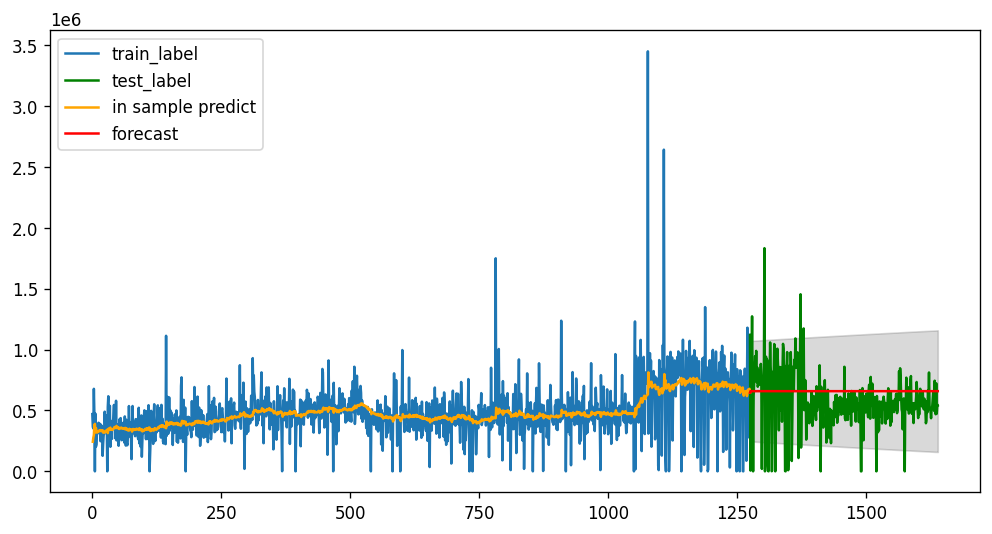

In [69]:
# Forecast

fcast = model_fit.forecast(steps=len(series)-N)  # 95% conf
fc = model_fit.get_forecast(steps=len(series)-N).summary_frame()

fc_series = pd.Series(fc['mean'], index=range(N,len(series)))
#mean_series = pd.Series(fc['mean'], index=range(N,len(series)))
lower_series = pd.Series(fc.mean_ci_lower, index=range(N,len(series)))
upper_series = pd.Series(fc.mean_ci_upper, index=range(N,len(series)))

plt.rcParams.update({'figure.figsize':(10,5)})
fig, ax = plt.subplots()
ax.plot(df.index[:N+1],series[:N+1],label='train_label') # train
ax.plot(df.index[N:],series[N:],color='green',label='test_label') # test
ax.plot(df.iloc[1:N+1].index,model_fit.predict(start=1,end=N,dynamic=False,typ='levels'),
        color='orange',label='in sample predict') # in-sample
ax.plot(fc_series, label='forecast', color='red') # forecast
ax.fill_between(df.iloc[N:].index, lower_series, upper_series, color='k', alpha=.15) # conf
ax.legend(loc='upper left')

In [70]:
# train
X = pd.DataFrame(range(N),columns=['day'])
X = sm.add_constant(X)
lm=sm.OLS(df['PRICE PER SQFT'][:N],X).fit()
insample = lm.predict(X)
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:         PRICE PER SQFT   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     190.4
Date:                Fri, 28 Apr 2023   Prob (F-statistic):           1.80e-40
Time:                        18:46:08   Log-Likelihood:                -17455.
No. Observations:                1275   AIC:                         3.491e+04
Df Residuals:                    1273   BIC:                         3.492e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.504e+05    1.2e+04     29.313      0.0

MAE

In [71]:
#test
X = pd.DataFrame(range(N-1,len(df)),columns=['day'])
X = sm.add_constant(X)
pred = lm.predict(X)

In [72]:
# compare out-of-sample performance
print('ARIMA model out-of-sample MAE', mean_absolute_error(df['PRICE PER SQFT'][N:],fc_series))
print('trend model out-of-sample MAE', mean_absolute_error(df['PRICE PER SQFT'][N-1:],pred))

ARIMA model out-of-sample MAE 184953.52564093503
trend model out-of-sample MAE 204436.14731653547


RSME

In [73]:
from sklearn import metrics
def RSME(y_true, y_pred):
    rmse = metrics.mean_squared_error(y_true, y_pred)**0.5
    return rmse

In [74]:
print('in-sample RSME', RSME(df.iloc[1:N+1]['PRICE PER SQFT'], model_fit.predict(start=1,end=N,dynamic=False,typ='levels')))

in-sample RSME 206319.01277535546


In [75]:
print('ARIMA model out-of-sample RSME', RSME(df['PRICE PER SQFT'][N:],fc_series))
print('trend model out-of-sample RSME', RSME(df['PRICE PER SQFT'][N-1:],pred))

ARIMA model out-of-sample RSME 244673.58457975968
trend model out-of-sample RSME 257300.91224179443


R2 

In [76]:
from sklearn.metrics import r2_score

# 计算Insample的R2
insample_r2 = r2_score(df['PRICE PER SQFT'][:N], insample)

# 计算Outsample的R2
outsample_r2 = r2_score(df['PRICE PER SQFT'][N:], fc_series)

print("Insample R2: ", insample_r2)
print("Outsample R2: ", outsample_r2)


Insample R2:  0.13011854979171888
Outsample R2:  -0.10311183188958295


In [77]:
### Load and curate zipcode data

In [78]:
# # download zipcode map
# url = 'https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip'
# # alternative url
# # url = 'https://github.com/CUSP2020PUI/Data/raw/master/ZIPCODE.zip'
# urllib.request.urlretrieve(url,'ZIPCODE.zip')

In [79]:
# #it comes in the zip archive, so use zipfile module to extract it
# import zipfile
# with zipfile.ZipFile('ZIPCODE.zip', 'r') as zip_ref:
#     zip_ref.extractall('ZIPCODE')

In [80]:
# os.listdir('./ZIPCODE') #check the filename for the shapefile

In [81]:
# #load the resulting shapefile using geopandas 
# zipcode = gpd.read_file('./ZIPCODE/ZIP_CODE_040114.shp')
# zipcode.head()

# 2. Merge Data

### Merge 311 data + median income data

In [82]:
#merge income data with 311
DataIncome1=dataIncome.merge(data311,left_index=True,right_index=True)
DataIncome1.head()

,Median,Mean,Pop,APPLIANCE,Adopt-A-Basket,Air Quality,Animal Abuse,Animal Facility - No Permit,Animal in a Park,Asbestos,...,Unsanitary Pigeon Condition,Urinating in Public,Vacant Lot,Vending,Violation of Park Rules,Water Conservation,Water Quality,Water System,Window Guard,X-Ray Machine/Equipment
Zip,,,,,,,,,,,,,,,,,,,,,
10001.0,71244.6100,123112.7764,17678,0,1,90,0,0,1,20,...,3,0,2,51,5,5,2,366,0,0
10002.0,30843.9574,46258.6118,70878,15,0,80,0,0,21,18,...,5,1,4,27,14,10,7,324,0,0
10003.0,89998.5339,139330.9968,53609,15,1,143,0,2,44,24,...,7,11,2,54,25,12,5,318,0,0
10004.0,110183.6857,156682.7615,1271,0,0,15,0,0,4,3,...,1,1,0,16,21,0,0,37,0,0
10005.0,115133.2855,163762.6601,1517,0,0,15,0,0,4,1,...,0,0,0,25,0,1,0,36,0,0


### Merge 311 data + median income data + real estate sample data

In [83]:
len(Sales_all_drop_null_featurs)

29137

In [84]:
Sales_all_drop_null_featurs.head()

,SALE DATE,SALE PRICE,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,Council District,Census Tract,PRICE PER SQFT
ZIP CODE,,,,,,,,,,,,,,
10003.0,2020-10-30,15850000,567,16,1.0,0.0,1.0,2307,5178.0,1900.0,1,2.0,59.0,3061.027424
10003.0,2020-10-01,9350000,924,12,1.0,0.0,1.0,1840,4500.0,1901.0,1,2.0,48.0,2077.777778
10003.0,2020-11-25,28000000,568,10,1.0,0.0,1.0,1976,6202.0,1900.0,1,2.0,61.0,4514.672686
10003.0,2020-10-29,9000000,874,50,1.0,0.0,1.0,2162,7589.0,1910.0,1,2.0,50.0,1185.927000
10003.0,2020-05-28,8405000,450,10,3.0,0.0,3.0,2013,6875.0,1901.0,1,2.0,38.0,1222.545455


In [85]:
list_Sales_all_drop_null_featurs=list(Sales_all_drop_null_featurs.columns)
string_list_Sales_all_drop_null_featurs =  ' + '.join(list_Sales_all_drop_null_featurs)
string_list_Sales_all_drop_null_featurs

'SALE DATE + SALE PRICE + BLOCK + LOT + RESIDENTIAL UNITS + COMMERCIAL UNITS + TOTAL UNITS + LAND SQUARE FEET + GROSS SQUARE FEET + YEAR BUILT + TAX CLASS AT TIME OF SALE + Council District + Census Tract + PRICE PER SQFT'

In [86]:
len(DataIncome1),len(Sales_all_drop_null_featurs)

(232, 29137)

In [87]:
Sales_all_drop_null_featurs.head()

,SALE DATE,SALE PRICE,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,Council District,Census Tract,PRICE PER SQFT
ZIP CODE,,,,,,,,,,,,,,
10003.0,2020-10-30,15850000,567,16,1.0,0.0,1.0,2307,5178.0,1900.0,1,2.0,59.0,3061.027424
10003.0,2020-10-01,9350000,924,12,1.0,0.0,1.0,1840,4500.0,1901.0,1,2.0,48.0,2077.777778
10003.0,2020-11-25,28000000,568,10,1.0,0.0,1.0,1976,6202.0,1900.0,1,2.0,61.0,4514.672686
10003.0,2020-10-29,9000000,874,50,1.0,0.0,1.0,2162,7589.0,1910.0,1,2.0,50.0,1185.927000
10003.0,2020-05-28,8405000,450,10,3.0,0.0,3.0,2013,6875.0,1901.0,1,2.0,38.0,1222.545455


In [88]:
#merge DataIncome1 data with real estate sample data
DataIncome2=DataIncome1.merge(Sales_all_drop_null_featurs,left_index=True,right_index=True)
DataIncome2.head()

,Median,Mean,Pop,APPLIANCE,Adopt-A-Basket,Air Quality,Animal Abuse,Animal Facility - No Permit,Animal in a Park,Asbestos,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,Council District,Census Tract,PRICE PER SQFT
10003.0,89998.5339,139330.9968,53609,15,1,143,0,2,44,24,...,1.0,0.0,1.0,2307,5178.0,1900.0,1,2.0,59.0,3061.027424
10003.0,89998.5339,139330.9968,53609,15,1,143,0,2,44,24,...,1.0,0.0,1.0,1840,4500.0,1901.0,1,2.0,48.0,2077.777778
10003.0,89998.5339,139330.9968,53609,15,1,143,0,2,44,24,...,1.0,0.0,1.0,1976,6202.0,1900.0,1,2.0,61.0,4514.672686
10003.0,89998.5339,139330.9968,53609,15,1,143,0,2,44,24,...,1.0,0.0,1.0,2162,7589.0,1910.0,1,2.0,50.0,1185.927000
10003.0,89998.5339,139330.9968,53609,15,1,143,0,2,44,24,...,3.0,0.0,3.0,2013,6875.0,1901.0,1,2.0,38.0,1222.545455


In [89]:
time = DataIncome2['SALE DATE']
time

10003.0   2020-10-30
10003.0   2020-10-01
10003.0   2020-11-25
10003.0   2020-10-29
10003.0   2020-05-28
             ...    
11436.0   2021-03-16
11436.0   2021-12-13
11436.0   2021-02-03
11436.0   2021-07-26
11436.0   2019-09-11
Name: SALE DATE, Length: 28470, dtype: datetime64[ns]

In [90]:
# 选择所有时间在 2021 年之前的数据
time_before_2021 = time[time.dt.year < 2021]

# 计算数据长度
len_time_before_2021 = len(time_before_2021)

# 打印结果
print("Length of time before 2021:", len_time_before_2021)

Length of time before 2021: 27042


In [91]:
DataIncome2.shape

(28470, 179)

In [92]:
DataIncome2['DOW'] = pd.to_datetime(DataIncome2['SALE DATE']).dt.dayofweek
DataIncome2 = DataIncome2.drop('SALE DATE', axis=1)
DataIncome2.head()

,Median,Mean,Pop,APPLIANCE,Adopt-A-Basket,Air Quality,Animal Abuse,Animal Facility - No Permit,Animal in a Park,Asbestos,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,Council District,Census Tract,PRICE PER SQFT,DOW
10003.0,89998.5339,139330.9968,53609,15,1,143,0,2,44,24,...,0.0,1.0,2307,5178.0,1900.0,1,2.0,59.0,3061.027424,4
10003.0,89998.5339,139330.9968,53609,15,1,143,0,2,44,24,...,0.0,1.0,1840,4500.0,1901.0,1,2.0,48.0,2077.777778,3
10003.0,89998.5339,139330.9968,53609,15,1,143,0,2,44,24,...,0.0,1.0,1976,6202.0,1900.0,1,2.0,61.0,4514.672686,2
10003.0,89998.5339,139330.9968,53609,15,1,143,0,2,44,24,...,0.0,1.0,2162,7589.0,1910.0,1,2.0,50.0,1185.927000,3
10003.0,89998.5339,139330.9968,53609,15,1,143,0,2,44,24,...,0.0,3.0,2013,6875.0,1901.0,1,2.0,38.0,1222.545455,3


In [93]:
DataIncome2.shape

(28470, 179)

In [94]:
DataIncome2['LAND SQUARE FEET'].unique

<bound method Series.unique of 10003.0     2307
10003.0     1840
10003.0     1976
10003.0     2162
10003.0     2013
           ...  
11436.0    2,000
11436.0    2,000
11436.0    2,000
11436.0    1,600
11436.0    1,900
Name: LAND SQUARE FEET, Length: 28470, dtype: object>

In [95]:
DataIncome2['LAND SQUARE FEET'] = pd.to_numeric(DataIncome2['LAND SQUARE FEET'].str.replace(',', '').str.replace('-', ''), errors='coerce')
DataIncome2['LAND SQUARE FEET']

10003.0    2307
10003.0    1840
10003.0    1976
10003.0    2162
10003.0    2013
           ... 
11436.0    2000
11436.0    2000
11436.0    2000
11436.0    1600
11436.0    1900
Name: LAND SQUARE FEET, Length: 28470, dtype: int64

In [96]:
DataIncome2['GROSS SQUARE FEET'].unique

<bound method Series.unique of 10003.0    5178.0
10003.0    4500.0
10003.0    6202.0
10003.0    7589.0
10003.0    6875.0
            ...  
11436.0     756.0
11436.0     840.0
11436.0     944.0
11436.0     938.0
11436.0     882.0
Name: GROSS SQUARE FEET, Length: 28470, dtype: float64>

In [97]:
DataIncome2['GROSS SQUARE FEET']

10003.0    5178.0
10003.0    4500.0
10003.0    6202.0
10003.0    7589.0
10003.0    6875.0
            ...  
11436.0     756.0
11436.0     840.0
11436.0     944.0
11436.0     938.0
11436.0     882.0
Name: GROSS SQUARE FEET, Length: 28470, dtype: float64

# 111--------测试

In [98]:
#DataIncome2 = DataIncome2.drop(columns=['SALE PRICE'])

In [99]:
# DataIncome2['GROSS SQUARE FEET'] = pd.to_numeric(DataIncome2['GROSS SQUARE FEET'].str.replace(',', '').str.replace('-', ''), errors='coerce')
# DataIncome2['GROSS SQUARE FEET']

In [100]:
string_cols = list(DataIncome2.select_dtypes(include=['object']).columns)
print(string_cols)

[]


In [101]:
# delete columns that contains string
DataIncome2 = DataIncome2.select_dtypes(exclude=['object'])
DataIncome2.shape

(28470, 179)

In [102]:
list_DataIncome2=list(DataIncome2.columns)
string_DataIncome2 =  ' + '.join(list_DataIncome2)
string_DataIncome2

'Median + Mean + Pop + APPLIANCE + Adopt-A-Basket + Air Quality + Animal Abuse + Animal Facility - No Permit + Animal in a Park + Asbestos + BEST/Site Safety + Beach/Pool/Sauna Complaint + Bike Rack Condition + Bike/Roller/Skate Chronic + Blocked Driveway + Boilers + Bottled Water + Bridge Condition + Broken Muni Meter + Broken Parking Meter + Building Condition + Building/Use + Bus Stop Shelter Placement + CONSTRUCTION + Calorie Labeling + City Vehicle Placard Complaint + Collection Truck Noise + Construction + Consumer Complaint + Cranes and Derricks + Curb Condition + DOF Parking - Tax Exemption + DPR Internal + Damaged Tree + Dead Tree + Derelict Bicycle + Derelict Vehicle + Derelict Vehicles + Dirty Conditions + Disorderly Youth + Drinking + Drinking Water + EAP Inspection - F59 + ELECTRIC + Electrical + Elevator + Emergency Response Team (ERT) + Fire Alarm - Addition + Fire Alarm - Modification + Fire Alarm - New System + Fire Alarm - Reinspection + Fire Alarm - Replacement + Fir

# 3. mormalize Data

In [103]:
y = DataIncome2['PRICE PER SQFT']
y = pd.DataFrame(y)
y = y.reset_index(drop=True)
y.head()

,PRICE PER SQFT
0,3061.027424
1,2077.777778
2,4514.672686
3,1185.927000
4,1222.545455


In [104]:
len(y)

28470

In [105]:
# 删除sale_price列
X = DataIncome2.drop(columns=['PRICE PER SQFT'])

X.describe()

,Median,Mean,Pop,APPLIANCE,Adopt-A-Basket,Air Quality,Animal Abuse,Animal Facility - No Permit,Animal in a Park,Asbestos,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,Council District,Census Tract,DOW
count,28470.000000,28470.000000,28470.000000,28470.000000,28470.000000,28470.00000,28470.000000,28470.000000,28470.000000,28470.000000,...,28470.000000,28470.000000,28470.000000,28470.000000,28470.000000,28466.000000,28470.0,28158.000000,28158.000000,28470.000000
mean,58862.415856,71576.212063,50042.335090,26.551809,0.190376,23.13797,3.371795,0.588971,7.255743,8.137302,...,1.412961,0.017281,1.430207,3003.987215,1625.777134,1941.083609,1.0,34.127353,9245.587435,2.141904
std,15815.315478,18082.774890,23388.299196,32.590620,0.505273,19.91766,11.178581,0.929533,13.379366,6.985984,...,0.598857,0.131126,0.620548,1884.558695,857.396777,46.385809,0.0,12.548946,25826.103817,1.423457
min,1520.168000,1673.411500,109.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,250.000000,120.000000,0.000000,1.0,1.000000,1.000000,0.000000
25%,47788.290100,59039.106500,33174.000000,7.000000,0.000000,9.00000,0.000000,0.000000,1.000000,4.000000,...,1.000000,0.000000,1.000000,2000.000000,964.000000,1920.000000,1.0,26.000000,243.000000,1.000000
50%,57183.051500,69595.461900,41750.000000,16.000000,0.000000,18.00000,0.000000,0.000000,4.000000,6.000000,...,1.000000,0.000000,1.000000,2500.000000,1410.000000,1935.000000,1.0,31.000000,528.000000,2.000000
75%,71126.556400,84085.113800,69646.000000,31.000000,0.000000,33.00000,0.000000,1.000000,9.000000,11.000000,...,2.000000,0.000000,2.000000,3950.000000,2040.000000,1955.000000,1.0,48.000000,1267.000000,3.000000
max,113800.384600,198530.108100,106461.000000,210.000000,6.000000,211.00000,71.000000,4.000000,156.000000,54.000000,...,10.000000,2.000000,10.000000,83425.000000,17100.000000,2021.000000,1.0,51.000000,157903.000000,6.000000


In [106]:
std = X.std()
constant_cols = std[std == 0].index
print(constant_cols)

Index(['Literature Request', 'TAX CLASS AT TIME OF SALE'], dtype='object')


In [107]:
# 数据归一化
scaler = MinMaxScaler()
X_nomalized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)

# 打印前5行
X_nomalized.head()

,Median,Mean,Pop,APPLIANCE,Adopt-A-Basket,Air Quality,Animal Abuse,Animal Facility - No Permit,Animal in a Park,Asbestos,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,Council District,Census Tract,DOW
10003.0,0.788014,0.699278,0.503046,0.071429,0.166667,0.677725,0.0,0.5,0.282051,0.444444,...,0.1,0.0,0.1,0.024731,0.297880,0.940129,0.0,0.02,0.000367,0.666667
10003.0,0.788014,0.699278,0.503046,0.071429,0.166667,0.677725,0.0,0.5,0.282051,0.444444,...,0.1,0.0,0.1,0.019116,0.257951,0.940623,0.0,0.02,0.000298,0.500000
10003.0,0.788014,0.699278,0.503046,0.071429,0.166667,0.677725,0.0,0.5,0.282051,0.444444,...,0.1,0.0,0.1,0.020751,0.358186,0.940129,0.0,0.02,0.000380,0.333333
10003.0,0.788014,0.699278,0.503046,0.071429,0.166667,0.677725,0.0,0.5,0.282051,0.444444,...,0.1,0.0,0.1,0.022988,0.439870,0.945077,0.0,0.02,0.000310,0.500000
10003.0,0.788014,0.699278,0.503046,0.071429,0.166667,0.677725,0.0,0.5,0.282051,0.444444,...,0.3,0.0,0.3,0.021196,0.397821,0.940623,0.0,0.02,0.000234,0.500000


In [108]:
X_nomalized.shape

(28470, 178)

In [109]:
X_nomalized = X_nomalized.reset_index(drop=True)
X_nomalized = X_nomalized.fillna(0)

In [110]:
print(len(y))
print(len(X_nomalized))

28470
28470


In [111]:
from sklearn.model_selection import train_test_split

# X为特征数据集，y为标签数据集
X_train, X_test, y_train, y_test = train_test_split(X_nomalized, y, test_size=0.2, random_state=42)



In [112]:
# # 划分训练集和测试集
# X_train = X_nomalized[:len_time_before_2021]
# y_train = y[:len_time_before_2021]
# X_test = X_nomalized[len_time_before_2021:]
# y_test = y[len_time_before_2021:]

print('X_train set:',X_train.shape)
print('y_train set:',y_train.shape)
print('X_test set:',X_test.shape)
print('y_test set:',y_test.shape)

X_train set: (22776, 178)
y_train set: (22776, 1)
X_test set: (5694, 178)
y_test set: (5694, 1)


---

#### Before PCA

In [113]:

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [114]:
# lm=sm.OLS(y_train,sm.add_constant(X_train.iloc[:,:])).fit()
# print(lm.summary())

In [115]:
# # 检查列是否相同
# print("X_train columns:", X_train.columns)
# print("X_test columns:", X_test.columns)
# print("Columns are the same:", set(X_train.columns) == set(X_test.columns))

# # 查看lm参数数量
# print("Number of lm parameters:", len(lm.params))

# # 比较lm参数数量与X_test加上截距项的列数
# X_test_with_constant = sm.add_constant(X_test)
# print("Number of X_test_with_constant columns:", X_test_with_constant.shape[1])
# print("Columns match with lm parameters:", len(lm.params) == X_test_with_constant.shape[1])


In [116]:
# 向X_train手动添加截距项
X_train['intercept'] = 1

# 使用新的X_train训练模型
lm = sm.OLS(y_train, X_train).fit()
print(lm.summary())

# 向X_test手动添加截距项
X_test['intercept'] = 1

# 使用新的X_test_with_constant进行预测
y_pred = lm.predict(X_test)

# 如果需要，可以从X_train和X_test中删除'intercept'列
X_train.drop(columns=['intercept'], inplace=True)
X_test.drop(columns=['intercept'], inplace=True)


                            OLS Regression Results                            
Dep. Variable:         PRICE PER SQFT   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     336.1
Date:                Fri, 28 Apr 2023   Prob (F-statistic):               0.00
Time:                        18:46:09   Log-Likelihood:            -1.4895e+05
No. Observations:               22776   AIC:                         2.982e+05
Df Residuals:                   22611   BIC:                         2.996e+05
Df Model:                         164                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [117]:
# 向 X_train 添加截距项
X_train['intercept'] = 1

# 预测训练集
y_train_pred = lm.predict(X_train)

# 从 X_train 中删除截距项
X_train.drop(columns=['intercept'], inplace=True)

# 计算训练集的 R2 分数
r2_train = r2_score(y_train, y_train_pred)
print('In-sample R2 score:', r2_train)

# 计算测试集的 R2 分数
r2_test = r2_score(y_test, y_pred)
print('Out-of-sample R2 score:', r2_test)

# 计算测试集的 MSE
mse_test = mean_squared_error(y_test, y_pred)
print('Out-of-sample MSE:', mse_test)

# 计算测试集的 MAE
mae_test = mean_absolute_error(y_test, y_pred)
print('Out-of-sample MAE:', mae_test)


In-sample R2 score: 0.7091380102858544
Out-of-sample R2 score: -1.0035199738498322e+18
Out-of-sample MSE: 8.790550890777582e+22
Out-of-sample MAE: 3929156474.948757


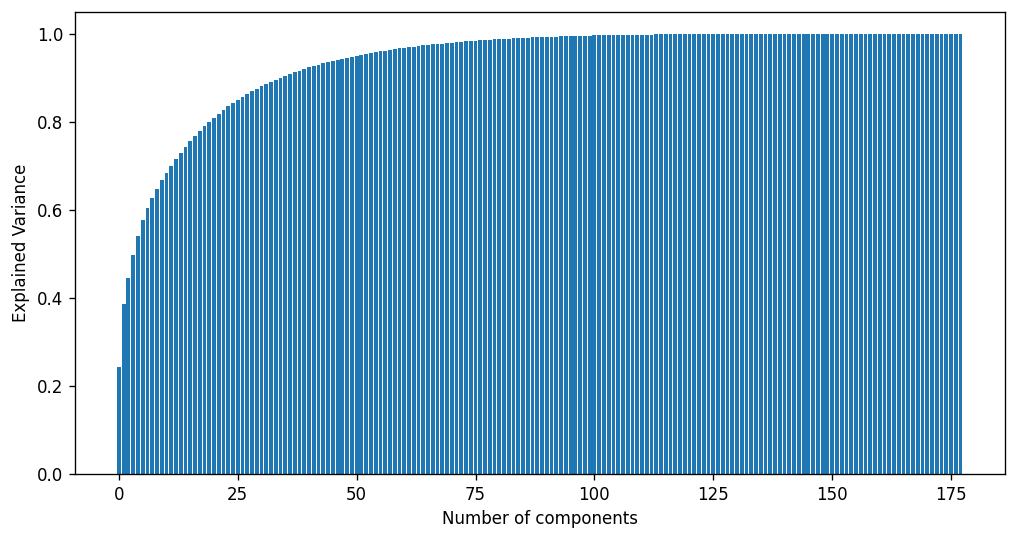

In [118]:
#Plot explained variance per number of leading PC's 
#perform PC decomposition over data

pca = PCA(X_train.shape[1])
dataP=pca.fit_transform(X_train)
eigenvalues = pca.explained_variance_ratio_
#plot explained variance over the number of compinents
n=X_train.shape[1]
plt.bar(np.arange(n), eigenvalues[:n].cumsum())
plt.xlabel("Number of components")
plt.ylabel("Explained Variance")
plt.show()

In [119]:
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance_ratio >= 0.9) + 1

print("selected n_components：", n_components)

selected n_components： 36


# 4. Train model

#### OLS  After PCA

In [120]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [121]:
scaler = preprocessing.StandardScaler().fit(X_train) 
pca = PCA(36) #take only 3 leading principal components to get enough data but avoid overfitting
P_train=pca.fit_transform(scaler.transform(X_train)) #get principal components for the scaled training sample
res=sm.OLS(y_train,sm.add_constant(P_train)).fit() #fit the regression over 

P_test=pca.transform(scaler.transform(X_test))
y_pred=np.asarray(res.predict(sm.add_constant(P_test)))

In [122]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         PRICE PER SQFT   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     305.6
Date:                Fri, 28 Apr 2023   Prob (F-statistic):               0.00
Time:                        18:46:10   Log-Likelihood:            -1.5852e+05
No. Observations:               22776   AIC:                         3.171e+05
Df Residuals:                   22739   BIC:                         3.174e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        463.3976      1.690    274.137      0.0

In [123]:

# 预测训练集
y_train_pred = res.predict(sm.add_constant(P_train))

# 计算训练集的 R2 分数
r2_train = r2_score(y_train, y_train_pred)
print('In-sample R2 score:', r2_train)

# 计算测试集的 R2 分数
r2_test = r2_score(y_test, y_pred)
print('Out-of-sample R2 score:', r2_test)

# 计算测试集的 MSE
mse_test = mean_squared_error(y_test, y_pred)
print('Out-of-sample MSE:', mse_test)

# 计算测试集的 MAE
mae_test = mean_absolute_error(y_test, y_pred)
print('Out-of-sample MAE:', mae_test)


In-sample R2 score: 0.32608814810025855
Out-of-sample R2 score: 0.34324335505351167
Out-of-sample MSE: 57530.02292630367
Out-of-sample MAE: 151.69670012102117


#### Before PCA

In [124]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
from torch import nn
from torch.optim import Adam
from torch.utils.data import DataLoader, TensorDataset

# 定义神经网络模型
class MyModel(nn.Module):
    def __init__(self, input_dim):
        super(MyModel, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.layers(x)

model = MyModel(X_train.shape[1])

# 编译模型
opt = Adam(model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

# Prepare DataLoader
train_dataset = TensorDataset(torch.tensor(X_train.values, dtype=torch.float32), 
                              torch.tensor(y_train.values, dtype=torch.float32))
test_dataset = TensorDataset(torch.tensor(X_test.values, dtype=torch.float32), 
                             torch.tensor(y_test.values, dtype=torch.float32))
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# 训练模型
num_epochs = 100

for epoch in range(num_epochs):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        opt.zero_grad()
        output = model(data)
        loss = loss_fn(output, target.view(-1, 1))
        loss.backward()
        opt.step()

    model.eval()
    with torch.no_grad():
        test_loss = 0
        for data, target in test_loader:
            output = model(data)
            test_loss += loss_fn(output, target.view(-1, 1)).item()
        test_loss /= len(test_loader)
        print(f'Epoch {epoch+1}/{num_epochs}, Test Loss: {test_loss:.4f}')

# 预测测试集
model.eval()
with torch.no_grad():
    y_pred = model(torch.tensor(X_test.values, dtype=torch.float32)).numpy()

# 计算R2分数
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('R2 score:', r2)

Epoch 1/100, Test Loss: 69053.6263
Epoch 2/100, Test Loss: 54837.5572
Epoch 3/100, Test Loss: 42945.4131
Epoch 4/100, Test Loss: 37884.9028
Epoch 5/100, Test Loss: 33758.9159
Epoch 6/100, Test Loss: 42528.4775
Epoch 7/100, Test Loss: 39686.8191
Epoch 8/100, Test Loss: 56810.9298
Epoch 9/100, Test Loss: 38901.2064
Epoch 10/100, Test Loss: 29122.1825
Epoch 11/100, Test Loss: 34452.5124
Epoch 12/100, Test Loss: 31284.8600
Epoch 13/100, Test Loss: 28764.8884
Epoch 14/100, Test Loss: 26367.3091
Epoch 15/100, Test Loss: 26613.2836
Epoch 16/100, Test Loss: 27196.4703
Epoch 17/100, Test Loss: 31254.1180
Epoch 18/100, Test Loss: 29321.9172
Epoch 19/100, Test Loss: 28615.2108
Epoch 20/100, Test Loss: 37691.2168
Epoch 21/100, Test Loss: 33284.6492
Epoch 22/100, Test Loss: 30749.3185
Epoch 23/100, Test Loss: 27019.9975
Epoch 24/100, Test Loss: 31923.4842
Epoch 25/100, Test Loss: 33748.4567
Epoch 26/100, Test Loss: 40046.0757
Epoch 27/100, Test Loss: 25832.3319
Epoch 28/100, Test Loss: 27894.2347
E

In [125]:
# 训练集
model.eval()
with torch.no_grad():
    y_train_pred = model(torch.tensor(X_train.values, dtype=torch.float32)).numpy()
r2_train = r2_score(y_train, y_train_pred)
print('In sample R2 score:', r2_train)

# 测试集
with torch.no_grad():
    y_test_pred = model(torch.tensor(X_test.values, dtype=torch.float32)).numpy()
r2_test = r2_score(y_test, y_test_pred)
print('Out of sample R2 score:', r2_test)

In sample R2 score: 0.756047498025062
Out of sample R2 score: 0.7541889388204253


In [126]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)


MSE: 21532.35310828442


In [127]:
mae = mean_absolute_error(y_test, y_pred)
print('MAE:', mae)

MAE: 95.5463786831627


#### After PCA

In [128]:
from sklearn.decomposition import PCA

# 进行PCA降维
pca = PCA(n_components=36)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# 定义神经网络模型
class MyModel(nn.Module):
    def __init__(self, input_dim):
        super(MyModel, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.layers(x)

model = MyModel(X_train_pca.shape[1])

# 编译模型
opt = Adam(model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

# Prepare DataLoader
train_dataset = TensorDataset(torch.tensor(X_train_pca, dtype=torch.float32), torch.tensor(y_train.values, dtype=torch.float32))
test_dataset = TensorDataset(torch.tensor(X_test_pca, dtype=torch.float32), torch.tensor(y_test.values, dtype=torch.float32))
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# 训练模型
num_epochs = 100

for epoch in range(num_epochs):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        opt.zero_grad()
        output = model(data)
        loss = loss_fn(output, target.view(-1, 1))
        loss.backward()
        opt.step()

    model.eval()
    with torch.no_grad():
        test_loss = 0
        for data, target in test_loader:
            output = model(data)
            test_loss += loss_fn(output, target.view(-1, 1)).item()
        test_loss /= len(test_loader)
        print(f'Epoch {epoch+1}/{num_epochs}, Test Loss: {test_loss:.4f}')

# 预测测试集
model.eval()
with torch.no_grad():
    y_pred = model(torch.tensor(X_test_pca, dtype=torch.float32)).numpy()

# 计算R2分数
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('R2 score:', r2)

Epoch 1/100, Test Loss: 63884.6822
Epoch 2/100, Test Loss: 61822.1923
Epoch 3/100, Test Loss: 64619.4366
Epoch 4/100, Test Loss: 60591.1771
Epoch 5/100, Test Loss: 63741.4643
Epoch 6/100, Test Loss: 64921.5646
Epoch 7/100, Test Loss: 63380.3274
Epoch 8/100, Test Loss: 66219.1556
Epoch 9/100, Test Loss: 64439.5186
Epoch 10/100, Test Loss: 59911.2218
Epoch 11/100, Test Loss: 59332.2039
Epoch 12/100, Test Loss: 62032.1319
Epoch 13/100, Test Loss: 59039.4589
Epoch 14/100, Test Loss: 59505.9710
Epoch 15/100, Test Loss: 59875.5543
Epoch 16/100, Test Loss: 60396.9970
Epoch 17/100, Test Loss: 59927.4356
Epoch 18/100, Test Loss: 58710.5405
Epoch 19/100, Test Loss: 60196.4257
Epoch 20/100, Test Loss: 58845.8420
Epoch 21/100, Test Loss: 60751.4352
Epoch 22/100, Test Loss: 60075.7125
Epoch 23/100, Test Loss: 61120.4729
Epoch 24/100, Test Loss: 60266.0057
Epoch 25/100, Test Loss: 60309.5718
Epoch 26/100, Test Loss: 59431.2841
Epoch 27/100, Test Loss: 59184.6638
Epoch 28/100, Test Loss: 59586.4779
E

In [129]:

model.eval()
with torch.no_grad():
    y_train_pred = model(torch.tensor(X_train_pca, dtype=torch.float32)).numpy()
r2_train = r2_score(y_train, y_train_pred)
print('In sample R2 score:', r2_train)


with torch.no_grad():
    y_test_pred = model(torch.tensor(X_test_pca, dtype=torch.float32)).numpy()

r2_test = r2_score(y_test, y_test_pred)
print('Out sample R2 score:', r2_test)

In sample R2 score: 0.35497059215362003
Out sample R2 score: 0.33386221087000667


In [130]:

mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)


MSE: 58351.78460028867


In [131]:
mae = mean_absolute_error(y_test, y_pred)
print('MAE:', mae)

MAE: 152.1506501859953


# xgboost


#### Before PCA

In [132]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix

In [133]:


model = xgb.XGBRegressor(objective ='reg:squarederror')
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)


mae = mean_absolute_error(y_test, y_pred)
print('MAE:', mae)




MSE: 1537.281461753963
MAE: 8.816701086932206


In [134]:
y_train_pred = model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print('In-sample R2 score:', r2_train)

In-sample R2 score: 0.9994627460285908


In [135]:
r2_test = r2_score(y_test, y_pred)
print('Out-of-sample R2 score:', r2_test)

Out-of-sample R2 score: 0.982450557746982


#### After PCA

In [136]:

pca = PCA(n_components=36)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [137]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


model = xgb.XGBRegressor(objective ='reg:squarederror')
model.fit(X_train_pca, y_train)


y_pred = model.predict(X_test_pca)


mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)



mae = mean_absolute_error(y_test, y_pred)
print('MAE:', mae)

MSE: 55543.893446423936
MAE: 148.45684247050838


In [138]:
y_train_pred = model.predict(X_train_pca)
r2_train = r2_score(y_train, y_train_pred)
print('In-sample R2 score:', r2_train)
r2_test = r2_score(y_test, y_pred)
print('Out-of-sample R2 score:', r2_test)

In-sample R2 score: 0.71950429704982
Out-of-sample R2 score: 0.36591679871450367


In [139]:
# ## run linear regression again but with selected PCs

# all_IS = []
# all_OS = []
# n_samples, n_features = X_train.shape[0],X_train.shape[1]

# for n_c in range(1, 50):
#     np.random.seed(0)
#     # Apply cross-validation to diagnose model for overfitting
#     R_IS=[]; R_OS=[] #lists for recording in-sample (training) and out-of-sample (test) R2 
#     #now apply PCA to the training data
#     scaler = preprocessing.StandardScaler().fit(X_train) #introduce a scaler first as it is important to scale data before PCA!
#     pca = PCA(n_components = n_c) #take only 3 leading principal components to get enough data but avoid overfitting
#     P_train=pca.fit_transform(scaler.transform(X_train)) #get principal components for the scaled training sample
#     res=sm.OLS(y_train,sm.add_constant(P_train)).fit() #fit the regression over 
#         #and apply the same scaling and rotation (PCA) transform we learned for training sample to the test sample
#         #this is important that we learn scaling and PCA transform from the training sample only rather than from both - training and test
#         #as this is part of the principle component regression we need to train; and all training should happen over the training set
#     P_test=pca.transform(scaler.transform(X_test))
#     y_pred=np.asarray(res.predict(sm.add_constant(P_test)))

#     R_IS.append(res.rsquared)
#     R_OS.append(r2_score(y_test,y_pred))
#     print('n_components = '+ str(n_c))
#     print("IS R-squared is %.3f"%np.mean(R_IS))
#     print("OS R-squared is %.3f"%np.mean(R_OS))
#     all_IS.append(np.mean(R_IS))
#     all_OS.append(np.mean(R_OS))
#     print('--------------------------------------------')

In [140]:
# fig = plt.figure(figsize=(10,7))
# plt.bar(range(1, 50), all_IS, alpha=0.7, label="mean of IS R2")
# plt.bar(range(1, 50), all_OS,label="mean of OS R2")
# plt.xlabel("Number of components")
# plt.ylabel("mean of R2")
# plt.title("mean of IS & OS R2")
# plt.legend()
# plt.show()

In [141]:
# max_value = max(all_OS)
# max_index = all_OS.index(max_value)
# print("the Max Mean R2 ：", max_value)
# print("the n_components is ：", max_index + 1)


In [142]:
'''# slect n_components = 3

## run linear regression again but with selected PCs
np.random.seed(0)
# Apply cross-validation to diagnose model for overfitting
R_IS=[]; R_OS=[] #lists for recording in-sample (training) and out-of-sample (test) R2
n=20 #number of runs
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:],Y,test_size=0.3) 
    #randomly split data into training (70%) and test (30%)
    #now apply PCA to the training data
    scaler = preprocessing.StandardScaler().fit(X_train) 
    #introduce a scaler first as it is important to scale data before PCA!
    pca = PCA(n_components = 3) #take only 3 leading principal components to get enough data but avoid overfitting
    P_train=pca.fit_transform(scaler.transform(X_train)) #get principal components for the scaled training sample
    res=sm.OLS(y_train,sm.add_constant(P_train)).fit() #fit the regression over 
    P_test=pca.transform(scaler.transform(X_test))
    y_pred=np.asarray(res.predict(sm.add_constant(P_test)))

    R_IS.append(res.rsquared)
    R_OS.append(r2_score(y_test,y_pred))
print('n_components = '+ str(3))
print("IS R-squared is %.3f+-%.3f"%(np.mean(R_IS),np.std(R_IS)))
print("OS R-squared is %.3f+-%.3f"%(np.mean(R_OS),np.std(R_OS)))
'''

'# slect n_components = 3\n\n## run linear regression again but with selected PCs\nnp.random.seed(0)\n# Apply cross-validation to diagnose model for overfitting\nR_IS=[]; R_OS=[] #lists for recording in-sample (training) and out-of-sample (test) R2\nn=20 #number of runs\nfor i in range(n):\n    X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:],Y,test_size=0.3) \n    #randomly split data into training (70%) and test (30%)\n    #now apply PCA to the training data\n    scaler = preprocessing.StandardScaler().fit(X_train) \n    #introduce a scaler first as it is important to scale data before PCA!\n    pca = PCA(n_components = 3) #take only 3 leading principal components to get enough data but avoid overfitting\n    P_train=pca.fit_transform(scaler.transform(X_train)) #get principal components for the scaled training sample\n    res=sm.OLS(y_train,sm.add_constant(P_train)).fit() #fit the regression over \n    P_test=pca.transform(scaler.transform(X_test))\n    y_pred=np.as

In [143]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# import torch
# from torch import nn
# from torch.optim import Adam
# from torch.utils.data import DataLoader, TensorDataset

# # 定义神经网络模型
# class MyModel(nn.Module):
#     def __init__(self, input_dim):
#         super(MyModel, self).__init__()
#         self.layers = nn.Sequential(
#             nn.Linear(input_dim, 128),
#             nn.ReLU(),
#             nn.Dropout(0.2),
#             nn.Linear(128, 64),
#             nn.ReLU(),
#             nn.Dropout(0.2),
#             nn.Linear(64, 32),
#             nn.ReLU(),
#             nn.Dropout(0.2),
#             nn.Linear(32, 1)
#         )

#     def forward(self, x):
#         return self.layers(x)

# model = MyModel(X_train.shape[1])

# # 编译模型
# opt = Adam(model.parameters(), lr=0.01)
# loss_fn = nn.MSELoss()

# # Prepare DataLoader
# train_dataset = TensorDataset(torch.tensor(X_train.values, dtype=torch.float32), 
#                               torch.tensor(y_train.values, dtype=torch.float32))
# test_dataset = TensorDataset(torch.tensor(X_test.values, dtype=torch.float32), 
#                              torch.tensor(y_test.values, dtype=torch.float32))
# train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# # 训练模型
# num_epochs = 100

# for epoch in range(num_epochs):
#     model.train()
#     for batch_idx, (data, target) in enumerate(train_loader):
#         opt.zero_grad()
#         output = model(data)
#         loss = loss_fn(output, target.view(-1, 1))
#         loss.backward()
#         opt.step()

#     model.eval()
#     with torch.no_grad():
#         test_loss = 0
#         for data, target in test_loader:
#             output = model(data)
#             test_loss += loss_fn(output, target.view(-1, 1)).item()
#         test_loss /= len(test_loader)
#         print(f'Epoch {epoch+1}/{num_epochs}, Test Loss: {test_loss:.4f}')

# # 预测测试集
# model.eval()
# with torch.no_grad():
#     y_pred = model(torch.tensor(X_test.values, dtype=torch.float32)).numpy()

# # 计算R2分数
# from sklearn.metrics import r2_score
# r2 = r2_score(y_test, y_pred)
# print('R2 score:', r2)

In [144]:
# # 训练集
# model.eval()
# with torch.no_grad():
#     y_train_pred = model(torch.tensor(X_train.values, dtype=torch.float32)).numpy()
# r2_train = r2_score(y_train, y_train_pred)
# print('In sample R2 score:', r2_train)

# # 测试集
# with torch.no_grad():
#     y_test_pred = model(torch.tensor(X_test.values, dtype=torch.float32)).numpy()
# r2_test = r2_score(y_test, y_test_pred)
# print('Out of sample R2 score:', r2_test)


In [145]:
# from sklearn.decomposition import PCA

# # 进行PCA降维
# pca = PCA(n_components=43)
# X_train_pca = pca.fit_transform(X_train)
# X_test_pca = pca.transform(X_test)

# # 定义神经网络模型
# class MyModel(nn.Module):
#     def __init__(self, input_dim):
#         super(MyModel, self).__init__()
#         self.layers = nn.Sequential(
#             nn.Linear(input_dim, 128),
#             nn.ReLU(),
#             nn.Dropout(0.2),
#             nn.Linear(128, 64),
#             nn.ReLU(),
#             nn.Dropout(0.2),
#             nn.Linear(64, 32),
#             nn.ReLU(),
#             nn.Dropout(0.2),
#             nn.Linear(32, 1)
#         )

#     def forward(self, x):
#         return self.layers(x)

# model = MyModel(X_train_pca.shape[1])

# # 编译模型
# opt = Adam(model.parameters(), lr=0.01)
# loss_fn = nn.MSELoss()

# # Prepare DataLoader
# train_dataset = TensorDataset(torch.tensor(X_train_pca, dtype=torch.float32), torch.tensor(y_train.values, dtype=torch.float32))
# test_dataset = TensorDataset(torch.tensor(X_test_pca, dtype=torch.float32), torch.tensor(y_test.values, dtype=torch.float32))
# train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# # 训练模型
# num_epochs = 100

# for epoch in range(num_epochs):
#     model.train()
#     for batch_idx, (data, target) in enumerate(train_loader):
#         opt.zero_grad()
#         output = model(data)
#         loss = loss_fn(output, target.view(-1, 1))
#         loss.backward()
#         opt.step()

#     model.eval()
#     with torch.no_grad():
#         test_loss = 0
#         for data, target in test_loader:
#             output = model(data)
#             test_loss += loss_fn(output, target.view(-1, 1)).item()
#         test_loss /= len(test_loader)
#         print(f'Epoch {epoch+1}/{num_epochs}, Test Loss: {test_loss:.4f}')

# # 预测测试集
# model.eval()
# with torch.no_grad():
#     y_pred = model(torch.tensor(X_test_pca, dtype=torch.float32)).numpy()

# # 计算R2分数
# from sklearn.metrics import r2_score
# r2 = r2_score(y_test, y_pred)
# print('R2 score:', r2)


In [146]:
# # 计算in sample R2分数
# model.eval()
# with torch.no_grad():
#     y_train_pred = model(torch.tensor(X_train_pca, dtype=torch.float32)).numpy()
# r2_train = r2_score(y_train, y_train_pred)
# print('in sample R2 score:', r2_train)

# # 预测测试集
# with torch.no_grad():
#     y_test_pred = model(torch.tensor(X_test_pca, dtype=torch.float32)).numpy()

# # 计算out sample R2分数
# r2_test = r2_score(y_test, y_test_pred)
# print('out sample R2 score:', r2_test)


---

In [147]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from keras.models import Sequential
# from keras.layers import Dense, Dropout
# from keras.optimizers import Adam

# # 定义神经网络模型
# model = Sequential()
# model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(1, activation='linear'))

# # 编译模型
# opt = Adam(learning_rate=0.01)
# model.compile(loss='mean_squared_error', optimizer=opt)

# # 训练模型
# history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), verbose=1)

# # 预测测试集
# y_pred = model.predict(X_test)

# # 计算R2分数
# from sklearn.metrics import r2_score
# r2 = r2_score(y_test, y_pred)
# print('R2 score:', r2)


In [148]:
# # 训练集
# y_train_pred = model.predict(X_train)
# r2_train = r2_score(y_train, y_train_pred)
# print('In sample R2 score:', r2_train)

# # 测试集
# y_test_pred = model.predict(X_test)
# r2_test = r2_score(y_test, y_test_pred)
# print('Out of sample R2 score:', r2_test)


In [149]:
# # 进行PCA降维
# pca = PCA(n_components=43)
# X_train_pca = pca.fit_transform(X_train)
# X_test_pca = pca.transform(X_test)

# # 定义神经网络模型
# model = Sequential()
# model.add(Dense(128, input_dim=X_train_pca.shape[1], activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(1, activation='linear'))

# # 编译模型
# opt = Adam(learning_rate=0.01)
# model.compile(loss='mean_squared_error', optimizer=opt)

# # 训练模型
# history = model.fit(X_train_pca, y_train, epochs=100, batch_size=64, validation_data=(X_test_pca, y_test), verbose=1)

# # 预测测试集
# y_pred = model.predict(X_test_pca)

# # 计算R2分数
# from sklearn.metrics import r2_score
# r2 = r2_score(y_test, y_pred)
# print('R2 score:', r2)

In [150]:
# # 计算in sample R2分数
# r2_train = r2_score(y_train, y_train_pred)
# print('in sample R2 score:', r2_train)

# # 预测测试集
# y_test_pred = model.predict(X_test_pca)

# # 计算out sample R2分数
# r2_test = r2_score(y_test, y_test_pred)
# print('out sample R2 score:', r2_test)